## Preparation

In [1]:
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from func.EI_calculation import tpm_ei
from func.p_calculation import calculate_or_p
from func.p_calculation import calculate_xor_p
from func.p_calculation import noise_modify_p

In [2]:
%run EI_calculation.ipynb

In [3]:
%run p_calculation.ipynb

In [4]:
A_OR_EI_result = {}
A_OR_Un_result = {}
A_OR_Syn_result = {}
A_XOR_EI_result = {}
A_XOR_Un_result = {}
A_XOR_Syn_result = {}

In [5]:
AB_OR_EI_result = {}
AB_OR_Un_result = {}
AB_OR_Syn_result = {}
AB_XOR_EI_result = {}
AB_XOR_Un_result = {}
AB_XOR_Syn_result = {}

In [6]:
ABC_OR_EI_result = {}
ABC_OR_Un_result = {}
ABC_OR_Syn_result = {}
ABC_XOR_EI_result = {}
ABC_XOR_Un_result = {}
ABC_XOR_Syn_result = {}

In [7]:
ABCD_OR_EI_result = {}
ABCD_OR_Un_result = {}
ABCD_OR_Syn_result = {}
ABCD_XOR_EI_result = {}
ABCD_XOR_Un_result = {}
ABCD_XOR_Syn_result = {}

In [8]:
import json

with open('A_OR_EI.json', 'r') as f:
    A_OR_EI_result = json.load(f)
with open('A_OR_Un.json', 'r') as f:
    A_OR_Un_result = json.load(f)
with open('A_OR_Syn.json', 'r') as f:
    A_OR_Syn_result = json.load(f)
with open('A_XOR_EI.json', 'r') as f:
    A_XOR_EI_result = json.load(f)
with open('A_XOR_Un.json', 'r') as f:
    A_XOR_Un_result = json.load(f)
with open('A_XOR_Syn.json', 'r') as f:
    A_XOR_Syn_result = json.load(f)

with open('AB_OR_EI.json', 'r') as f:
    AB_OR_EI_result = json.load(f)
with open('AB_OR_Un.json', 'r') as f:
    AB_OR_Un_result = json.load(f)
with open('AB_OR_Syn.json', 'r') as f:
    AB_OR_Syn_result = json.load(f)
with open('AB_XOR_EI.json', 'r') as f:
    AB_XOR_EI_result = json.load(f)
with open('AB_XOR_Un.json', 'r') as f:
    AB_XOR_Un_result = json.load(f)
with open('AB_XOR_Syn.json', 'r') as f:
    AB_XOR_Syn_result = json.load(f)
    
with open('ABC_OR_EI.json', 'r') as f:
    ABC_OR_EI_result = json.load(f)
with open('ABC_OR_Un.json', 'r') as f:
    ABC_OR_Un_result = json.load(f)
with open('ABC_OR_Syn.json', 'r') as f:
    ABC_OR_Syn_result = json.load(f)
with open('ABC_XOR_EI.json', 'r') as f:
    ABC_XOR_EI_result = json.load(f)
with open('ABC_XOR_Un.json', 'r') as f:
    ABC_XOR_Un_result = json.load(f)
with open('ABC_XOR_Syn.json', 'r') as f:
    ABC_XOR_Syn_result = json.load(f)

with open('ABCD_OR_EI.json', 'r') as f:
    ABCD_OR_EI_result = json.load(f)
with open('ABCD_OR_Un.json', 'r') as f:
    ABCD_OR_Un_result = json.load(f)
with open('ABCD_OR_Syn.json', 'r') as f:
    ABCD_OR_Syn_result = json.load(f)
with open('ABCD_XOR_EI.json', 'r') as f:
    ABCD_XOR_EI_result = json.load(f)
with open('ABCD_XOR_Un.json', 'r') as f:
    ABCD_XOR_Un_result = json.load(f)
with open('ABCD_XOR_Syn.json', 'r') as f:
    ABCD_XOR_Syn_result = json.load(f)

## function

In [8]:
def calculate_A_OR(noise_level):
    global Col
    Col = ['00', '10']  
    A_0 = np.empty((2, 2))
    for i in range(A_0.shape[0]):
        pa = calculate_or_p(i, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        A_0[i] = pa

    Col = ['01', '11'] 
    A_1 = np.empty((2, 2))
    for i in range(A_1.shape[0]):
        pa = calculate_or_p(i, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        A_1[i] = pa

    A_0_ei = tpm_ei(A_0, log_base=2)
    A_1_ei = tpm_ei(A_1, log_base=2)
    ei = (A_0_ei + A_1_ei) / 2

    A = np.mean([A_0, A_1], axis=0)
    un = tpm_ei(A, log_base=2)
    syn = ei - un

    return ei, un, syn

In [9]:
def calculate_A_XOR(noise_level):
    global Col
    Col = ['00', '10'] 
    A_0 = np.empty((2, 2))
    for i in range(A_0.shape[0]):
        pa = calculate_xor_p(i, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        A_0[i] = pa

    Col = ['01', '11'] 
    A_1 = np.empty((2, 2))
    for i in range(A_1.shape[0]):
        pa = calculate_xor_p(i, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        A_1[i] = pa

    A_0_ei = tpm_ei(A_0, log_base=2)
    A_1_ei = tpm_ei(A_1, log_base=2)
    ei = (A_0_ei + A_1_ei) / 2

    A = np.mean([A_0, A_1], axis=0)
    un = tpm_ei(A, log_base=2)
    syn = ei - un

    return ei, un, syn

In [10]:
def calculate_AB_OR(noise_level):
    global Col
    Col = ['000', '010', '100', '110'] 
    AB_0 = np.empty((4, 4))
    for i in range(AB_0.shape[0]):
        pa = calculate_or_p(i, 0, 1, 2)
        pb = calculate_or_p(i, 1, 0)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        AB_0[i] = np.kron(pa, pb)

    Col = ['001', '011', '101', '111'] 
    AB_1 = np.empty((4, 4))
    for i in range(AB_1.shape[0]):
        pa = calculate_or_p(i, 0, 1, 2)
        pb = calculate_or_p(i, 1, 0)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        AB_1[i] = np.kron(pa, pb)

    AB_0_ei = tpm_ei(AB_0, log_base=2)
    AB_1_ei = tpm_ei(AB_1, log_base=2)
    ei = (AB_0_ei + AB_1_ei) / 2

    AB = np.mean([AB_0, AB_1], axis=0)
    un = tpm_ei(AB, log_base=2)
    syn = ei - un

    return ei, un, syn

In [11]:
def calculate_AB_XOR(noise_level):
    global Col
    Col = ['000', '010', '100', '110']  
    AB_0 = np.empty((4, 4))
    for i in range(AB_0.shape[0]):
        pa = calculate_xor_p(i, 0, 1, 2)
        pb = calculate_xor_p(i, 1, 0)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        AB_0[i] = np.kron(pa, pb)

    Col = ['001', '011', '101', '111']  
    AB_1 = np.empty((4, 4))
    for i in range(AB_1.shape[0]):
        pa = calculate_xor_p(i, 0, 1, 2)
        pb = calculate_xor_p(i, 1, 0)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        AB_1[i] = np.kron(pa, pb)

    AB_0_ei = tpm_ei(AB_0, log_base=2)
    AB_1_ei = tpm_ei(AB_1, log_base=2)
    ei = (AB_0_ei + AB_1_ei) / 2

    AB = np.mean([AB_0, AB_1], axis=0)
    un = tpm_ei(AB, log_base=2)
    syn = ei - un

    return ei, un, syn

In [12]:
def calculate_ABC_OR(noise_level):
    global Col
    Col = ['{:03b}0'.format(i) for i in range(8)]  # 邻居为0时候矩阵
    ABC_0 = np.empty((8, 8))
    for i in range(ABC_0.shape[0]):
        pa = calculate_or_p(i, 0, 1, 2, 3)
        pb = calculate_or_p(i, 1, 0, 2)
        pc = calculate_or_p(i, 2, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        ABC_0[i] = np.kron(pa, np.kron(pb, pc))

    Col = ['{:03b}1'.format(i) for i in range(8)]  # 邻居为1时候矩阵
    ABC_1 = np.empty((8, 8))
    for i in range(ABC_1.shape[0]):
        pa = calculate_or_p(i, 0, 1, 2, 3)
        pb = calculate_or_p(i, 1, 0, 2)
        pc = calculate_or_p(i, 2, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        ABC_1[i] = np.kron(pa, np.kron(pb, pc))

    ABC_0_ei = tpm_ei(ABC_0, log_base=2)
    ABC_1_ei = tpm_ei(ABC_1, log_base=2)
    ei = (ABC_0_ei + ABC_1_ei) / 2

    ABC = np.mean([ABC_0, ABC_1], axis=0)
    un = tpm_ei(ABC, log_base=2)
    syn = ei - un

    return ei, un, syn

In [13]:
def calculate_ABC_XOR(noise_level):
    global Col
    Col = ['{:03b}0'.format(i) for i in range(8)]  # 邻居为0时候矩阵
    ABC_0 = np.empty((8, 8))
    for i in range(ABC_0.shape[0]):
        pa = calculate_xor_p(i, 0, 1, 2, 3)
        pb = calculate_xor_p(i, 1, 0, 2)
        pc = calculate_xor_p(i, 2, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        ABC_0[i] = np.kron(pa, np.kron(pb, pc))

    Col = ['{:03b}1'.format(i) for i in range(8)]  # 邻居为1时候矩阵
    ABC_1 = np.empty((8, 8))
    for i in range(ABC_1.shape[0]):
        pa = calculate_xor_p(i, 0, 1, 2, 3)
        pb = calculate_xor_p(i, 1, 0, 2)
        pc = calculate_xor_p(i, 2, 0, 1)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        ABC_1[i] = np.kron(pa, np.kron(pb, pc))

    ABC_0_ei = tpm_ei(ABC_0, log_base=2)
    ABC_1_ei = tpm_ei(ABC_1, log_base=2)
    ei = (ABC_0_ei + ABC_1_ei) / 2

    ABC = np.mean([ABC_0, ABC_1], axis=0)
    un = tpm_ei(ABC, log_base=2)
    syn = ei - un

    return ei, un, syn

In [14]:
def calculate_ABCD_OR(noise_level):
    global Col
    Col = ['{:04b}0'.format(i) for i in range(16)] 
    ABCD_0 = np.empty((16, 16))
    for i in range(ABCD_0.shape[0]):
        pa = calculate_or_p(i, 0, 1, 2, 3, 4)
        pb = calculate_or_p(i, 1, 0, 2, 3)
        pc = calculate_or_p(i, 2, 0, 1, 3)
        pd = calculate_or_p(i, 3, 0, 1, 2)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        pd = noise_modify_p(pd, noise_level)
        ABCD_0[i] = np.kron(pa, np.kron(pb, np.kron(pc, pd)))

    Col = ['{:04b}1'.format(i) for i in range(16)]  
    ABCD_1 = np.empty((16, 16))
    for i in range(ABCD_1.shape[0]):
        pa = calculate_or_p(i, 0, 1, 2, 3, 4)
        pb = calculate_or_p(i, 1, 0, 2, 3)
        pc = calculate_or_p(i, 2, 0, 1, 3)
        pd = calculate_or_p(i, 3, 0, 1, 2)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        pd = noise_modify_p(pd, noise_level)
        ABCD_1[i] = np.kron(pa, np.kron(pb, np.kron(pc, pd)))

    ABCD_0_ei = tpm_ei(ABCD_0, log_base=2)
    ABCD_1_ei = tpm_ei(ABCD_1, log_base=2)
    ei = (ABCD_0_ei + ABCD_1_ei) / 2

    ABCD = np.mean([ABCD_0, ABCD_1], axis=0)
    un = tpm_ei(ABCD, log_base=2)
    syn = ei - un

    return ei, un, syn

In [15]:
def calculate_ABCD_XOR(noise_level):
    global Col
    Col = ['{:04b}0'.format(i) for i in range(16)]  
    ABCD_0 = np.empty((16, 16))
    for i in range(ABCD_0.shape[0]):
        pa = calculate_xor_p(i, 0, 1, 2, 3, 4)
        pb = calculate_xor_p(i, 1, 0, 2, 3)
        pc = calculate_xor_p(i, 2, 0, 1, 3)
        pd = calculate_xor_p(i, 3, 0, 1, 2)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        pd = noise_modify_p(pd, noise_level)
        ABCD_0[i] = np.kron(pa, np.kron(pb, np.kron(pc, pd)))

    Col = ['{:04b}1'.format(i) for i in range(16)]  
    ABCD_1 = np.empty((16, 16))
    for i in range(ABCD_1.shape[0]):
        pa = calculate_xor_p(i, 0, 1, 2, 3, 4)
        pb = calculate_xor_p(i, 1, 0, 2, 3)
        pc = calculate_xor_p(i, 2, 0, 1, 3)
        pd = calculate_xor_p(i, 3, 0, 1, 2)
        pa = noise_modify_p(pa, noise_level)
        pb = noise_modify_p(pb, noise_level)
        pc = noise_modify_p(pc, noise_level)
        pd = noise_modify_p(pd, noise_level)
        ABCD_1[i] = np.kron(pa, np.kron(pb, np.kron(pc, pd)))

    ABCD_0_ei = tpm_ei(ABCD_0, log_base=2)
    ABCD_1_ei = tpm_ei(ABCD_1, log_base=2)
    ei = (ABCD_0_ei + ABCD_1_ei) / 2

    ABCD = np.mean([ABCD_0, ABCD_1], axis=0)
    un = tpm_ei(ABCD, log_base=2)
    syn = ei - un

    return ei, un, syn

## A

In [16]:
A_OR_EI_result['A_OR_00_EI'], A_OR_Un_result['A_OR_00_Un'], A_OR_Syn_result['A_OR_00_Syn'] = calculate_A_OR(0.0)
A_OR_EI_result['A_OR_05_EI'], A_OR_Un_result['A_OR_05_Un'], A_OR_Syn_result['A_OR_05_Syn'] = calculate_A_OR(0.05)
A_OR_EI_result['A_OR_10_EI'], A_OR_Un_result['A_OR_10_Un'], A_OR_Syn_result['A_OR_10_Syn'] = calculate_A_OR(0.10)
A_OR_EI_result['A_OR_15_EI'], A_OR_Un_result['A_OR_15_Un'], A_OR_Syn_result['A_OR_15_Syn'] = calculate_A_OR(0.15)
A_OR_EI_result['A_OR_20_EI'], A_OR_Un_result['A_OR_20_Un'], A_OR_Syn_result['A_OR_20_Syn'] = calculate_A_OR(0.20)
A_OR_EI_result['A_OR_25_EI'], A_OR_Un_result['A_OR_25_Un'], A_OR_Syn_result['A_OR_25_Syn'] = calculate_A_OR(0.25)
A_OR_EI_result['A_OR_30_EI'], A_OR_Un_result['A_OR_30_Un'], A_OR_Syn_result['A_OR_30_Syn'] = calculate_A_OR(0.30)
A_OR_EI_result['A_OR_35_EI'], A_OR_Un_result['A_OR_35_Un'], A_OR_Syn_result['A_OR_35_Syn'] = calculate_A_OR(0.35)
A_OR_EI_result['A_OR_40_EI'], A_OR_Un_result['A_OR_40_Un'], A_OR_Syn_result['A_OR_40_Syn'] = calculate_A_OR(0.40)
A_OR_EI_result['A_OR_45_EI'], A_OR_Un_result['A_OR_45_Un'], A_OR_Syn_result['A_OR_45_Syn'] = calculate_A_OR(0.45)
A_OR_EI_result['A_OR_50_EI'], A_OR_Un_result['A_OR_50_Un'], A_OR_Syn_result['A_OR_50_Syn'] = calculate_A_OR(0.50)

In [17]:
A_XOR_EI_result['A_XOR_00_EI'], A_XOR_Un_result['A_XOR_00_Un'], A_XOR_Syn_result['A_XOR_00_Syn'] = calculate_A_XOR(0.0)
A_XOR_EI_result['A_XOR_05_EI'], A_XOR_Un_result['A_XOR_05_Un'], A_XOR_Syn_result['A_XOR_05_Syn'] = calculate_A_XOR(0.05)
A_XOR_EI_result['A_XOR_10_EI'], A_XOR_Un_result['A_XOR_10_Un'], A_XOR_Syn_result['A_XOR_10_Syn'] = calculate_A_XOR(0.10)
A_XOR_EI_result['A_XOR_15_EI'], A_XOR_Un_result['A_XOR_15_Un'], A_XOR_Syn_result['A_XOR_15_Syn'] = calculate_A_XOR(0.15)
A_XOR_EI_result['A_XOR_20_EI'], A_XOR_Un_result['A_XOR_20_Un'], A_XOR_Syn_result['A_XOR_20_Syn'] = calculate_A_XOR(0.20)
A_XOR_EI_result['A_XOR_25_EI'], A_XOR_Un_result['A_XOR_25_Un'], A_XOR_Syn_result['A_XOR_25_Syn'] = calculate_A_XOR(0.25)
A_XOR_EI_result['A_XOR_30_EI'], A_XOR_Un_result['A_XOR_30_Un'], A_XOR_Syn_result['A_XOR_30_Syn'] = calculate_A_XOR(0.30)
A_XOR_EI_result['A_XOR_35_EI'], A_XOR_Un_result['A_XOR_35_Un'], A_XOR_Syn_result['A_XOR_35_Syn'] = calculate_A_XOR(0.35)
A_XOR_EI_result['A_XOR_40_EI'], A_XOR_Un_result['A_XOR_40_Un'], A_XOR_Syn_result['A_XOR_40_Syn'] = calculate_A_XOR(0.40)
A_XOR_EI_result['A_XOR_45_EI'], A_XOR_Un_result['A_XOR_45_Un'], A_XOR_Syn_result['A_XOR_45_Syn'] = calculate_A_XOR(0.45)
A_XOR_EI_result['A_XOR_50_EI'], A_XOR_Un_result['A_XOR_50_Un'], A_XOR_Syn_result['A_XOR_50_Syn'] = calculate_A_XOR(0.50)

## AB

In [18]:
AB_OR_EI_result['AB_OR_00_EI'], AB_OR_Un_result['AB_OR_00_Un'], AB_OR_Syn_result['AB_OR_00_Syn'] = calculate_AB_OR(0.0)
AB_OR_EI_result['AB_OR_05_EI'], AB_OR_Un_result['AB_OR_05_Un'], AB_OR_Syn_result['AB_OR_05_Syn'] = calculate_AB_OR(0.05)
AB_OR_EI_result['AB_OR_10_EI'], AB_OR_Un_result['AB_OR_10_Un'], AB_OR_Syn_result['AB_OR_10_Syn'] = calculate_AB_OR(0.10)
AB_OR_EI_result['AB_OR_15_EI'], AB_OR_Un_result['AB_OR_15_Un'], AB_OR_Syn_result['AB_OR_15_Syn'] = calculate_AB_OR(0.15)
AB_OR_EI_result['AB_OR_20_EI'], AB_OR_Un_result['AB_OR_20_Un'], AB_OR_Syn_result['AB_OR_20_Syn'] = calculate_AB_OR(0.20)
AB_OR_EI_result['AB_OR_25_EI'], AB_OR_Un_result['AB_OR_25_Un'], AB_OR_Syn_result['AB_OR_25_Syn'] = calculate_AB_OR(0.25)
AB_OR_EI_result['AB_OR_30_EI'], AB_OR_Un_result['AB_OR_30_Un'], AB_OR_Syn_result['AB_OR_30_Syn'] = calculate_AB_OR(0.30)
AB_OR_EI_result['AB_OR_35_EI'], AB_OR_Un_result['AB_OR_35_Un'], AB_OR_Syn_result['AB_OR_35_Syn'] = calculate_AB_OR(0.35)
AB_OR_EI_result['AB_OR_40_EI'], AB_OR_Un_result['AB_OR_40_Un'], AB_OR_Syn_result['AB_OR_40_Syn'] = calculate_AB_OR(0.40)
AB_OR_EI_result['AB_OR_45_EI'], AB_OR_Un_result['AB_OR_45_Un'], AB_OR_Syn_result['AB_OR_45_Syn'] = calculate_AB_OR(0.45)
AB_OR_EI_result['AB_OR_50_EI'], AB_OR_Un_result['AB_OR_50_Un'], AB_OR_Syn_result['AB_OR_50_Syn'] = calculate_AB_OR(0.50)

In [19]:
AB_XOR_EI_result['AB_XOR_00_EI'], AB_XOR_Un_result['AB_XOR_00_Un'], AB_XOR_Syn_result['AB_XOR_00_Syn'] = calculate_AB_XOR(0.0)
AB_XOR_EI_result['AB_XOR_05_EI'], AB_XOR_Un_result['AB_XOR_05_Un'], AB_XOR_Syn_result['AB_XOR_05_Syn'] = calculate_AB_XOR(0.05)
AB_XOR_EI_result['AB_XOR_10_EI'], AB_XOR_Un_result['AB_XOR_10_Un'], AB_XOR_Syn_result['AB_XOR_10_Syn'] = calculate_AB_XOR(0.10)
AB_XOR_EI_result['AB_XOR_15_EI'], AB_XOR_Un_result['AB_XOR_15_Un'], AB_XOR_Syn_result['AB_XOR_15_Syn'] = calculate_AB_XOR(0.15)
AB_XOR_EI_result['AB_XOR_20_EI'], AB_XOR_Un_result['AB_XOR_20_Un'], AB_XOR_Syn_result['AB_XOR_20_Syn'] = calculate_AB_XOR(0.20)
AB_XOR_EI_result['AB_XOR_25_EI'], AB_XOR_Un_result['AB_XOR_25_Un'], AB_XOR_Syn_result['AB_XOR_25_Syn'] = calculate_AB_XOR(0.25)
AB_XOR_EI_result['AB_XOR_30_EI'], AB_XOR_Un_result['AB_XOR_30_Un'], AB_XOR_Syn_result['AB_XOR_30_Syn'] = calculate_AB_XOR(0.30)
AB_XOR_EI_result['AB_XOR_35_EI'], AB_XOR_Un_result['AB_XOR_35_Un'], AB_XOR_Syn_result['AB_XOR_35_Syn'] = calculate_AB_XOR(0.35)
AB_XOR_EI_result['AB_XOR_40_EI'], AB_XOR_Un_result['AB_XOR_40_Un'], AB_XOR_Syn_result['AB_XOR_40_Syn'] = calculate_AB_XOR(0.40)
AB_XOR_EI_result['AB_XOR_45_EI'], AB_XOR_Un_result['AB_XOR_45_Un'], AB_XOR_Syn_result['AB_XOR_45_Syn'] = calculate_AB_XOR(0.45)
AB_XOR_EI_result['AB_XOR_50_EI'], AB_XOR_Un_result['AB_XOR_50_Un'], AB_XOR_Syn_result['AB_XOR_50_Syn'] = calculate_AB_XOR(0.50)

## ABC

In [20]:
ABC_OR_EI_result['ABC_OR_00_EI'], ABC_OR_Un_result['ABC_OR_00_Un'], ABC_OR_Syn_result['ABC_OR_00_Syn'] = calculate_ABC_OR(0.0)
ABC_OR_EI_result['ABC_OR_05_EI'], ABC_OR_Un_result['ABC_OR_05_Un'], ABC_OR_Syn_result['ABC_OR_05_Syn'] = calculate_ABC_OR(0.05)
ABC_OR_EI_result['ABC_OR_10_EI'], ABC_OR_Un_result['ABC_OR_10_Un'], ABC_OR_Syn_result['ABC_OR_10_Syn'] = calculate_ABC_OR(0.10)
ABC_OR_EI_result['ABC_OR_15_EI'], ABC_OR_Un_result['ABC_OR_15_Un'], ABC_OR_Syn_result['ABC_OR_15_Syn'] = calculate_ABC_OR(0.15)
ABC_OR_EI_result['ABC_OR_20_EI'], ABC_OR_Un_result['ABC_OR_20_Un'], ABC_OR_Syn_result['ABC_OR_20_Syn'] = calculate_ABC_OR(0.20)
ABC_OR_EI_result['ABC_OR_25_EI'], ABC_OR_Un_result['ABC_OR_25_Un'], ABC_OR_Syn_result['ABC_OR_25_Syn'] = calculate_ABC_OR(0.25)
ABC_OR_EI_result['ABC_OR_30_EI'], ABC_OR_Un_result['ABC_OR_30_Un'], ABC_OR_Syn_result['ABC_OR_30_Syn'] = calculate_ABC_OR(0.30)
ABC_OR_EI_result['ABC_OR_35_EI'], ABC_OR_Un_result['ABC_OR_35_Un'], ABC_OR_Syn_result['ABC_OR_35_Syn'] = calculate_ABC_OR(0.35)
ABC_OR_EI_result['ABC_OR_40_EI'], ABC_OR_Un_result['ABC_OR_40_Un'], ABC_OR_Syn_result['ABC_OR_40_Syn'] = calculate_ABC_OR(0.40)
ABC_OR_EI_result['ABC_OR_45_EI'], ABC_OR_Un_result['ABC_OR_45_Un'], ABC_OR_Syn_result['ABC_OR_45_Syn'] = calculate_ABC_OR(0.45)
ABC_OR_EI_result['ABC_OR_50_EI'], ABC_OR_Un_result['ABC_OR_50_Un'], ABC_OR_Syn_result['ABC_OR_50_Syn'] = calculate_ABC_OR(0.50)

In [21]:
ABC_XOR_EI_result['ABC_XOR_00_EI'], ABC_XOR_Un_result['ABC_XOR_00_Un'], ABC_XOR_Syn_result['ABC_XOR_00_Syn'] = calculate_ABC_XOR(0.0)
ABC_XOR_EI_result['ABC_XOR_05_EI'], ABC_XOR_Un_result['ABC_XOR_05_Un'], ABC_XOR_Syn_result['ABC_XOR_05_Syn'] = calculate_ABC_XOR(0.05)
ABC_XOR_EI_result['ABC_XOR_10_EI'], ABC_XOR_Un_result['ABC_XOR_10_Un'], ABC_XOR_Syn_result['ABC_XOR_10_Syn'] = calculate_ABC_XOR(0.10)
ABC_XOR_EI_result['ABC_XOR_15_EI'], ABC_XOR_Un_result['ABC_XOR_15_Un'], ABC_XOR_Syn_result['ABC_XOR_15_Syn'] = calculate_ABC_XOR(0.15)
ABC_XOR_EI_result['ABC_XOR_20_EI'], ABC_XOR_Un_result['ABC_XOR_20_Un'], ABC_XOR_Syn_result['ABC_XOR_20_Syn'] = calculate_ABC_XOR(0.20)
ABC_XOR_EI_result['ABC_XOR_25_EI'], ABC_XOR_Un_result['ABC_XOR_25_Un'], ABC_XOR_Syn_result['ABC_XOR_25_Syn'] = calculate_ABC_XOR(0.25)
ABC_XOR_EI_result['ABC_XOR_30_EI'], ABC_XOR_Un_result['ABC_XOR_30_Un'], ABC_XOR_Syn_result['ABC_XOR_30_Syn'] = calculate_ABC_XOR(0.30)
ABC_XOR_EI_result['ABC_XOR_35_EI'], ABC_XOR_Un_result['ABC_XOR_35_Un'], ABC_XOR_Syn_result['ABC_XOR_35_Syn'] = calculate_ABC_XOR(0.35)
ABC_XOR_EI_result['ABC_XOR_40_EI'], ABC_XOR_Un_result['ABC_XOR_40_Un'], ABC_XOR_Syn_result['ABC_XOR_40_Syn'] = calculate_ABC_XOR(0.40)
ABC_XOR_EI_result['ABC_XOR_45_EI'], ABC_XOR_Un_result['ABC_XOR_45_Un'], ABC_XOR_Syn_result['ABC_XOR_45_Syn'] = calculate_ABC_XOR(0.45)
ABC_XOR_EI_result['ABC_XOR_50_EI'], ABC_XOR_Un_result['ABC_XOR_50_Un'], ABC_XOR_Syn_result['ABC_XOR_50_Syn'] = calculate_ABC_XOR(0.50)

## ABCD

In [22]:
ABCD_OR_EI_result['ABCD_OR_00_EI'], ABCD_OR_Un_result['ABCD_OR_00_Un'], ABCD_OR_Syn_result['ABCD_OR_00_Syn'] = calculate_ABCD_OR(0.0)
ABCD_OR_EI_result['ABCD_OR_05_EI'], ABCD_OR_Un_result['ABCD_OR_05_Un'], ABCD_OR_Syn_result['ABCD_OR_05_Syn'] = calculate_ABCD_OR(0.05)
ABCD_OR_EI_result['ABCD_OR_10_EI'], ABCD_OR_Un_result['ABCD_OR_10_Un'], ABCD_OR_Syn_result['ABCD_OR_10_Syn'] = calculate_ABCD_OR(0.10)
ABCD_OR_EI_result['ABCD_OR_15_EI'], ABCD_OR_Un_result['ABCD_OR_15_Un'], ABCD_OR_Syn_result['ABCD_OR_15_Syn'] = calculate_ABCD_OR(0.15)
ABCD_OR_EI_result['ABCD_OR_20_EI'], ABCD_OR_Un_result['ABCD_OR_20_Un'], ABCD_OR_Syn_result['ABCD_OR_20_Syn'] = calculate_ABCD_OR(0.20)
ABCD_OR_EI_result['ABCD_OR_25_EI'], ABCD_OR_Un_result['ABCD_OR_25_Un'], ABCD_OR_Syn_result['ABCD_OR_25_Syn'] = calculate_ABCD_OR(0.25)
ABCD_OR_EI_result['ABCD_OR_30_EI'], ABCD_OR_Un_result['ABCD_OR_30_Un'], ABCD_OR_Syn_result['ABCD_OR_30_Syn'] = calculate_ABCD_OR(0.30)
ABCD_OR_EI_result['ABCD_OR_35_EI'], ABCD_OR_Un_result['ABCD_OR_35_Un'], ABCD_OR_Syn_result['ABCD_OR_35_Syn'] = calculate_ABCD_OR(0.35)
ABCD_OR_EI_result['ABCD_OR_40_EI'], ABCD_OR_Un_result['ABCD_OR_40_Un'], ABCD_OR_Syn_result['ABCD_OR_40_Syn'] = calculate_ABCD_OR(0.40)
ABCD_OR_EI_result['ABCD_OR_45_EI'], ABCD_OR_Un_result['ABCD_OR_45_Un'], ABCD_OR_Syn_result['ABCD_OR_45_Syn'] = calculate_ABCD_OR(0.45)
ABCD_OR_EI_result['ABCD_OR_50_EI'], ABCD_OR_Un_result['ABCD_OR_50_Un'], ABCD_OR_Syn_result['ABCD_OR_50_Syn'] = calculate_ABCD_OR(0.50)

In [23]:
ABCD_XOR_EI_result['ABCD_XOR_00_EI'], ABCD_XOR_Un_result['ABCD_XOR_00_Un'], ABCD_XOR_Syn_result['ABCD_XOR_00_Syn'] = calculate_ABCD_XOR(0.0)
ABCD_XOR_EI_result['ABCD_XOR_05_EI'], ABCD_XOR_Un_result['ABCD_XOR_05_Un'], ABCD_XOR_Syn_result['ABCD_XOR_05_Syn'] = calculate_ABCD_XOR(0.05)
ABCD_XOR_EI_result['ABCD_XOR_10_EI'], ABCD_XOR_Un_result['ABCD_XOR_10_Un'], ABCD_XOR_Syn_result['ABCD_XOR_10_Syn'] = calculate_ABCD_XOR(0.10)
ABCD_XOR_EI_result['ABCD_XOR_15_EI'], ABCD_XOR_Un_result['ABCD_XOR_15_Un'], ABCD_XOR_Syn_result['ABCD_XOR_15_Syn'] = calculate_ABCD_XOR(0.15)
ABCD_XOR_EI_result['ABCD_XOR_20_EI'], ABCD_XOR_Un_result['ABCD_XOR_20_Un'], ABCD_XOR_Syn_result['ABCD_XOR_20_Syn'] = calculate_ABCD_XOR(0.20)
ABCD_XOR_EI_result['ABCD_XOR_25_EI'], ABCD_XOR_Un_result['ABCD_XOR_25_Un'], ABCD_XOR_Syn_result['ABCD_XOR_25_Syn'] = calculate_ABCD_XOR(0.25)
ABCD_XOR_EI_result['ABCD_XOR_30_EI'], ABCD_XOR_Un_result['ABCD_XOR_30_Un'], ABCD_XOR_Syn_result['ABCD_XOR_30_Syn'] = calculate_ABCD_XOR(0.30)
ABCD_XOR_EI_result['ABCD_XOR_35_EI'], ABCD_XOR_Un_result['ABCD_XOR_35_Un'], ABCD_XOR_Syn_result['ABCD_XOR_35_Syn'] = calculate_ABCD_XOR(0.35)
ABCD_XOR_EI_result['ABCD_XOR_40_EI'], ABCD_XOR_Un_result['ABCD_XOR_40_Un'], ABCD_XOR_Syn_result['ABCD_XOR_40_Syn'] = calculate_ABCD_XOR(0.40)
ABCD_XOR_EI_result['ABCD_XOR_45_EI'], ABCD_XOR_Un_result['ABCD_XOR_45_Un'], ABCD_XOR_Syn_result['ABCD_XOR_45_Syn'] = calculate_ABCD_XOR(0.45)
ABCD_XOR_EI_result['ABCD_XOR_50_EI'], ABCD_XOR_Un_result['ABCD_XOR_50_Un'], ABCD_XOR_Syn_result['ABCD_XOR_50_Syn'] = calculate_ABCD_XOR(0.50)

## Result

In [24]:
A_OR_EI_result

{'A_OR_00_EI': 0.5,
 'A_OR_05_EI': 0.3568015214420218,
 'A_OR_10_EI': 0.26550220320535944,
 'A_OR_15_EI': 0.19507984764179978,
 'A_OR_20_EI': 0.13903595255631887,
 'A_OR_25_EI': 0.09436093777043358,
 'A_OR_30_EI': 0.05935455038465365,
 'A_OR_35_EI': 0.032965972312254524,
 'A_OR_40_EI': 0.014524702772665682,
 'A_OR_45_EI': 0.0036127730060958943,
 'A_OR_50_EI': 0.0}

In [25]:
A_OR_Un_result

{'A_OR_00_Un': 0.31127812445913283,
 'A_OR_05_Un': 0.20534969973663775,
 'A_OR_10_Un': 0.1467931024360521,
 'A_OR_15_Un': 0.10481597017296579,
 'A_OR_20_Un': 0.07310400793180985,
 'A_OR_25_Un': 0.0487949406953985,
 'A_OR_30_Un': 0.030305144839322347,
 'A_OR_35_Un': 0.01667423493544029,
 'A_OR_40_Un': 0.007299156760473963,
 'A_OR_45_Un': 0.0018086520489059357,
 'A_OR_50_Un': 0.0}

In [26]:
A_OR_Syn_result

{'A_OR_00_Syn': 0.18872187554086717,
 'A_OR_05_Syn': 0.15145182170538407,
 'A_OR_10_Syn': 0.11870910076930735,
 'A_OR_15_Syn': 0.09026387746883399,
 'A_OR_20_Syn': 0.06593194462450902,
 'A_OR_25_Syn': 0.045565997075035086,
 'A_OR_30_Syn': 0.0290494055453313,
 'A_OR_35_Syn': 0.016291737376814233,
 'A_OR_40_Syn': 0.007225546012191719,
 'A_OR_45_Syn': 0.0018041209571899586,
 'A_OR_50_Syn': 0.0}

In [27]:
A_XOR_EI_result

{'A_XOR_00_EI': 1.0,
 'A_XOR_05_EI': 0.7136030428840436,
 'A_XOR_10_EI': 0.5310044064107189,
 'A_XOR_15_EI': 0.39015969528359956,
 'A_XOR_20_EI': 0.27807190511263774,
 'A_XOR_25_EI': 0.18872187554086717,
 'A_XOR_30_EI': 0.1187091007693073,
 'A_XOR_35_EI': 0.06593194462450905,
 'A_XOR_40_EI': 0.029049405545331364,
 'A_XOR_45_EI': 0.007225546012191789,
 'A_XOR_50_EI': 0.0}

In [28]:
A_XOR_Un_result

{'A_XOR_00_Un': 0.0,
 'A_XOR_05_Un': 0.0,
 'A_XOR_10_Un': 0.0,
 'A_XOR_15_Un': 0.0,
 'A_XOR_20_Un': 0.0,
 'A_XOR_25_Un': 0.0,
 'A_XOR_30_Un': 0.0,
 'A_XOR_35_Un': 0.0,
 'A_XOR_40_Un': 0.0,
 'A_XOR_45_Un': 0.0,
 'A_XOR_50_Un': 0.0}

In [29]:
A_XOR_Syn_result

{'A_XOR_00_Syn': 1.0,
 'A_XOR_05_Syn': 0.7136030428840436,
 'A_XOR_10_Syn': 0.5310044064107189,
 'A_XOR_15_Syn': 0.39015969528359956,
 'A_XOR_20_Syn': 0.27807190511263774,
 'A_XOR_25_Syn': 0.18872187554086717,
 'A_XOR_30_Syn': 0.1187091007693073,
 'A_XOR_35_Syn': 0.06593194462450905,
 'A_XOR_40_Syn': 0.029049405545331364,
 'A_XOR_45_Syn': 0.007225546012191789,
 'A_XOR_50_Syn': 0.0}

In [30]:
AB_OR_EI_result

{'AB_OR_00_EI': 0.8112781244591329,
 'AB_OR_05_EI': 0.6367405633909401,
 'AB_OR_10_EI': 0.5037186866405287,
 'AB_OR_15_EI': 0.38795516152866893,
 'AB_OR_20_EI': 0.28691295465869765,
 'AB_OR_25_EI': 0.20042022224585715,
 'AB_OR_30_EI': 0.12887383802983896,
 'AB_OR_35_EI': 0.07274250222231697,
 'AB_OR_40_EI': 0.03240467252445055,
 'AB_OR_45_EI': 0.008111748178672629,
 'AB_OR_50_EI': 0.0}

In [31]:
AB_OR_Un_result

{'AB_OR_00_Un': 0.8112781244591329,
 'AB_OR_05_Un': 0.6002578894504157,
 'AB_OR_10_Un': 0.4607301882074649,
 'AB_OR_15_Un': 0.34670488882877337,
 'AB_OR_20_Un': 0.25154586118013894,
 'AB_OR_25_Un': 0.1729526476524792,
 'AB_OR_30_Un': 0.10980009235640949,
 'AB_OR_35_Un': 0.061372226131294214,
 'AB_OR_40_Un': 0.02715150470507177,
 'AB_OR_45_Un': 0.006768965464859968,
 'AB_OR_50_Un': 0.0}

In [32]:
AB_OR_Syn_result

{'AB_OR_00_Syn': 0.0,
 'AB_OR_05_Syn': 0.0364826739405244,
 'AB_OR_10_Syn': 0.04298849843306374,
 'AB_OR_15_Syn': 0.04125027269989556,
 'AB_OR_20_Syn': 0.03536709347855871,
 'AB_OR_25_Syn': 0.027467574593377952,
 'AB_OR_30_Syn': 0.019073745673429468,
 'AB_OR_35_Syn': 0.011370276091022757,
 'AB_OR_40_Syn': 0.005253167819378776,
 'AB_OR_45_Syn': 0.0013427827138126607,
 'AB_OR_50_Syn': 0.0}

In [33]:
AB_XOR_EI_result

{'AB_XOR_00_EI': 1.0,
 'AB_XOR_05_EI': 0.8801486339553711,
 'AB_XOR_10_EI': 0.7420858585497174,
 'AB_XOR_15_EI': 0.5994265703948821,
 'AB_XOR_20_EI': 0.4605252679497692,
 'AB_XOR_25_EI': 0.3318777540066993,
 'AB_XOR_30_EI': 0.21887209657226817,
 'AB_XOR_35_EI': 0.12601306072991106,
 'AB_XOR_40_EI': 0.056944347085864544,
 'AB_XOR_45_EI': 0.014378956070044926,
 'AB_XOR_50_EI': 0.0}

In [34]:
AB_XOR_Un_result

{'AB_XOR_00_Un': 1.0,
 'AB_XOR_05_Un': 0.7136030428840436,
 'AB_XOR_10_Un': 0.5310044064107189,
 'AB_XOR_15_Un': 0.3901596952835996,
 'AB_XOR_20_Un': 0.2780719051126376,
 'AB_XOR_25_Un': 0.18872187554086717,
 'AB_XOR_30_Un': 0.1187091007693073,
 'AB_XOR_35_Un': 0.06593194462450905,
 'AB_XOR_40_Un': 0.029049405545331364,
 'AB_XOR_45_Un': 0.007225546012191844,
 'AB_XOR_50_Un': 0.0}

In [35]:
AB_XOR_Syn_result

{'AB_XOR_00_Syn': 0.0,
 'AB_XOR_05_Syn': 0.1665455910713275,
 'AB_XOR_10_Syn': 0.21108145213899854,
 'AB_XOR_15_Syn': 0.2092668751112825,
 'AB_XOR_20_Syn': 0.18245336283713165,
 'AB_XOR_25_Syn': 0.1431558784658321,
 'AB_XOR_30_Syn': 0.10016299580296087,
 'AB_XOR_35_Syn': 0.06008111610540201,
 'AB_XOR_40_Syn': 0.02789494154053318,
 'AB_XOR_45_Syn': 0.007153410057853082,
 'AB_XOR_50_Syn': 0.0}

In [36]:
ABC_OR_EI_result

{'ABC_OR_00_EI': 0.5435644431995963,
 'ABC_OR_05_EI': 0.4936670514940149,
 'ABC_OR_10_EI': 0.4223306877018532,
 'ABC_OR_15_EI': 0.3430316299152504,
 'ABC_OR_20_EI': 0.26329409592036856,
 'ABC_OR_25_EI': 0.18863155256154862,
 'ABC_OR_30_EI': 0.1232598649376336,
 'ABC_OR_35_EI': 0.07021928699836523,
 'ABC_OR_40_EI': 0.03142649469423181,
 'ABC_OR_45_EI': 0.007882364755833173,
 'ABC_OR_50_EI': 0.0}

In [37]:
ABC_OR_Un_result

{'ABC_OR_00_Un': 0.5435644431995963,
 'ABC_OR_05_Un': 0.48494919117651836,
 'ABC_OR_10_Un': 0.40706815278210534,
 'ABC_OR_15_Un': 0.32505814303315883,
 'ABC_OR_20_Un': 0.24586645273889235,
 'ABC_OR_25_Un': 0.17400077219193066,
 'ABC_OR_30_Un': 0.11260350502094206,
 'ABC_OR_35_Un': 0.06369850019166876,
 'ABC_OR_40_Un': 0.028377684212415426,
 'ABC_OR_45_Un': 0.007099768066528802,
 'ABC_OR_50_Un': 0.0}

In [38]:
ABC_OR_Syn_result

{'ABC_OR_00_Syn': 0.0,
 'ABC_OR_05_Syn': 0.00871786031749655,
 'ABC_OR_10_Syn': 0.015262534919747883,
 'ABC_OR_15_Syn': 0.01797348688209155,
 'ABC_OR_20_Syn': 0.017427643181476216,
 'ABC_OR_25_Syn': 0.014630780369617957,
 'ABC_OR_30_Syn': 0.010656359916691546,
 'ABC_OR_35_Syn': 0.006520786806696474,
 'ABC_OR_40_Syn': 0.0030488104818163844,
 'ABC_OR_45_Syn': 0.0007825966893043714,
 'ABC_OR_50_Syn': 0.0}

In [39]:
ABC_XOR_EI_result

{'ABC_XOR_00_EI': 1.0,
 'ABC_XOR_05_EI': 0.9574151107679586,
 'ABC_XOR_10_EI': 0.8624177306350442,
 'ABC_XOR_15_EI': 0.7365158168178878,
 'ABC_XOR_20_EI': 0.5938432516792699,
 'ABC_XOR_25_EI': 0.4464064415667493,
 'ABC_XOR_30_EI': 0.3053257704493163,
 'ABC_XOR_35_EI': 0.18117479366247893,
 'ABC_XOR_40_EI': 0.08377202771535715,
 'ABC_XOR_45_EI': 0.02146165165251085,
 'ABC_XOR_50_EI': 0.0}

In [40]:
ABC_XOR_Un_result

{'ABC_XOR_00_Un': 1.0,
 'ABC_XOR_05_Un': 0.880148633955371,
 'ABC_XOR_10_Un': 0.7420858585497175,
 'ABC_XOR_15_Un': 0.5994265703948821,
 'ABC_XOR_20_Un': 0.4605252679497692,
 'ABC_XOR_25_Un': 0.3318777540066993,
 'ABC_XOR_30_Un': 0.21887209657226814,
 'ABC_XOR_35_Un': 0.126013060729911,
 'ABC_XOR_40_Un': 0.056944347085864544,
 'ABC_XOR_45_Un': 0.014378956070044899,
 'ABC_XOR_50_Un': 0.0}

In [41]:
ABC_XOR_Syn_result

{'ABC_XOR_00_Syn': 0.0,
 'ABC_XOR_05_Syn': 0.07726647681258758,
 'ABC_XOR_10_Syn': 0.1203318720853267,
 'ABC_XOR_15_Syn': 0.13708924642300568,
 'ABC_XOR_20_Syn': 0.13331798372950066,
 'ABC_XOR_25_Syn': 0.11452868756005002,
 'ABC_XOR_30_Syn': 0.08645367387704816,
 'ABC_XOR_35_Syn': 0.05516173293256793,
 'ABC_XOR_40_Syn': 0.026827680629492603,
 'ABC_XOR_45_Syn': 0.0070826955824659504,
 'ABC_XOR_50_Syn': 0.0}

In [42]:
ABCD_OR_EI_result

{'ABCD_OR_00_EI': 0.33729006661701383,
 'ABCD_OR_05_EI': 0.3230998664657716,
 'ABCD_OR_10_EI': 0.29019667953470774,
 'ABCD_OR_15_EI': 0.2449214960526091,
 'ABCD_OR_20_EI': 0.19317946697884897,
 'ABCD_OR_25_EI': 0.1407406177941838,
 'ABCD_OR_30_EI': 0.09269230723263285,
 'ABCD_OR_35_EI': 0.05288788007071166,
 'ABCD_OR_40_EI': 0.02363375741829013,
 'ABCD_OR_45_EI': 0.005916444921580033,
 'ABCD_OR_50_EI': 0.0}

In [43]:
ABCD_OR_Un_result

{'ABCD_OR_00_Un': 0.33729006661701383,
 'ABCD_OR_05_Un': 0.32029774254451343,
 'ABCD_OR_10_Un': 0.2842628656952974,
 'ABCD_OR_15_Un': 0.23693515613337046,
 'ABCD_OR_20_Un': 0.18468653930905055,
 'ABCD_OR_25_Un': 0.13317753569017188,
 'ABCD_OR_30_Un': 0.08700471283036147,
 'ABCD_OR_35_Un': 0.049368789563170465,
 'ABCD_OR_40_Un': 0.021990210443985414,
 'ABCD_OR_45_Un': 0.005496367441255525,
 'ABCD_OR_50_Un': 0.0}

In [44]:
ABCD_OR_Syn_result

{'ABCD_OR_00_Syn': 0.0,
 'ABCD_OR_05_Syn': 0.0028021239212581706,
 'ABCD_OR_10_Syn': 0.005933813839410329,
 'ABCD_OR_15_Syn': 0.007986339919238639,
 'ABCD_OR_20_Syn': 0.008492927669798422,
 'ABCD_OR_25_Syn': 0.007563082104011909,
 'ABCD_OR_30_Syn': 0.005687594402271373,
 'ABCD_OR_35_Syn': 0.003519090507541192,
 'ABCD_OR_40_Syn': 0.001643546974304716,
 'ABCD_OR_45_Syn': 0.00042007748032450807,
 'ABCD_OR_50_Syn': 0.0}

In [45]:
ABCD_XOR_EI_result

{'ABCD_XOR_00_EI': 1.0,
 'ABCD_XOR_05_EI': 0.9816255253850839,
 'ABCD_XOR_10_EI': 0.9219386585793158,
 'ABCD_XOR_15_EI': 0.8224217693022885,
 'ABCD_XOR_20_EI': 0.6908233568593299,
 'ABCD_XOR_25_EI': 0.5387856040010077,
 'ABCD_XOR_30_EI': 0.3805662805758389,
 'ABCD_XOR_35_EI': 0.23204201928815235,
 'ABCD_XOR_40_EI': 0.10960466046883514,
 'ABCD_XOR_45_EI': 0.0284749859611775,
 'ABCD_XOR_50_EI': 0.0}

In [46]:
ABCD_XOR_Un_result

{'ABCD_XOR_00_Un': 1.0,
 'ABCD_XOR_05_Un': 0.9574151107679586,
 'ABCD_XOR_10_Un': 0.8624177306350441,
 'ABCD_XOR_15_Un': 0.7365158168178878,
 'ABCD_XOR_20_Un': 0.5938432516792698,
 'ABCD_XOR_25_Un': 0.4464064415667493,
 'ABCD_XOR_30_Un': 0.3053257704493163,
 'ABCD_XOR_35_Un': 0.1811747936624788,
 'ABCD_XOR_40_Un': 0.08377202771535715,
 'ABCD_XOR_45_Un': 0.021461651652511134,
 'ABCD_XOR_50_Un': 0.0}

In [47]:
ABCD_XOR_Syn_result

{'ABCD_XOR_00_Syn': 0.0,
 'ABCD_XOR_05_Syn': 0.024210414617125253,
 'ABCD_XOR_10_Syn': 0.05952092794427166,
 'ABCD_XOR_15_Syn': 0.0859059524844007,
 'ABCD_XOR_20_Syn': 0.09698010518006017,
 'ABCD_XOR_25_Syn': 0.09237916243425842,
 'ABCD_XOR_30_Syn': 0.07524051012652261,
 'ABCD_XOR_35_Syn': 0.05086722562567356,
 'ABCD_XOR_40_Syn': 0.025832632753477996,
 'ABCD_XOR_45_Syn': 0.007013334308666366,
 'ABCD_XOR_50_Syn': 0.0}

## Picture

In [9]:
colors = {'A': '#78A9CD',  # 蓝色系
          'AB': '#F47F1E',  # 红色系
          'ABC': '#009E74',  # 绿色系
          'ABCD': '#9368AB'  # 紫色系
}

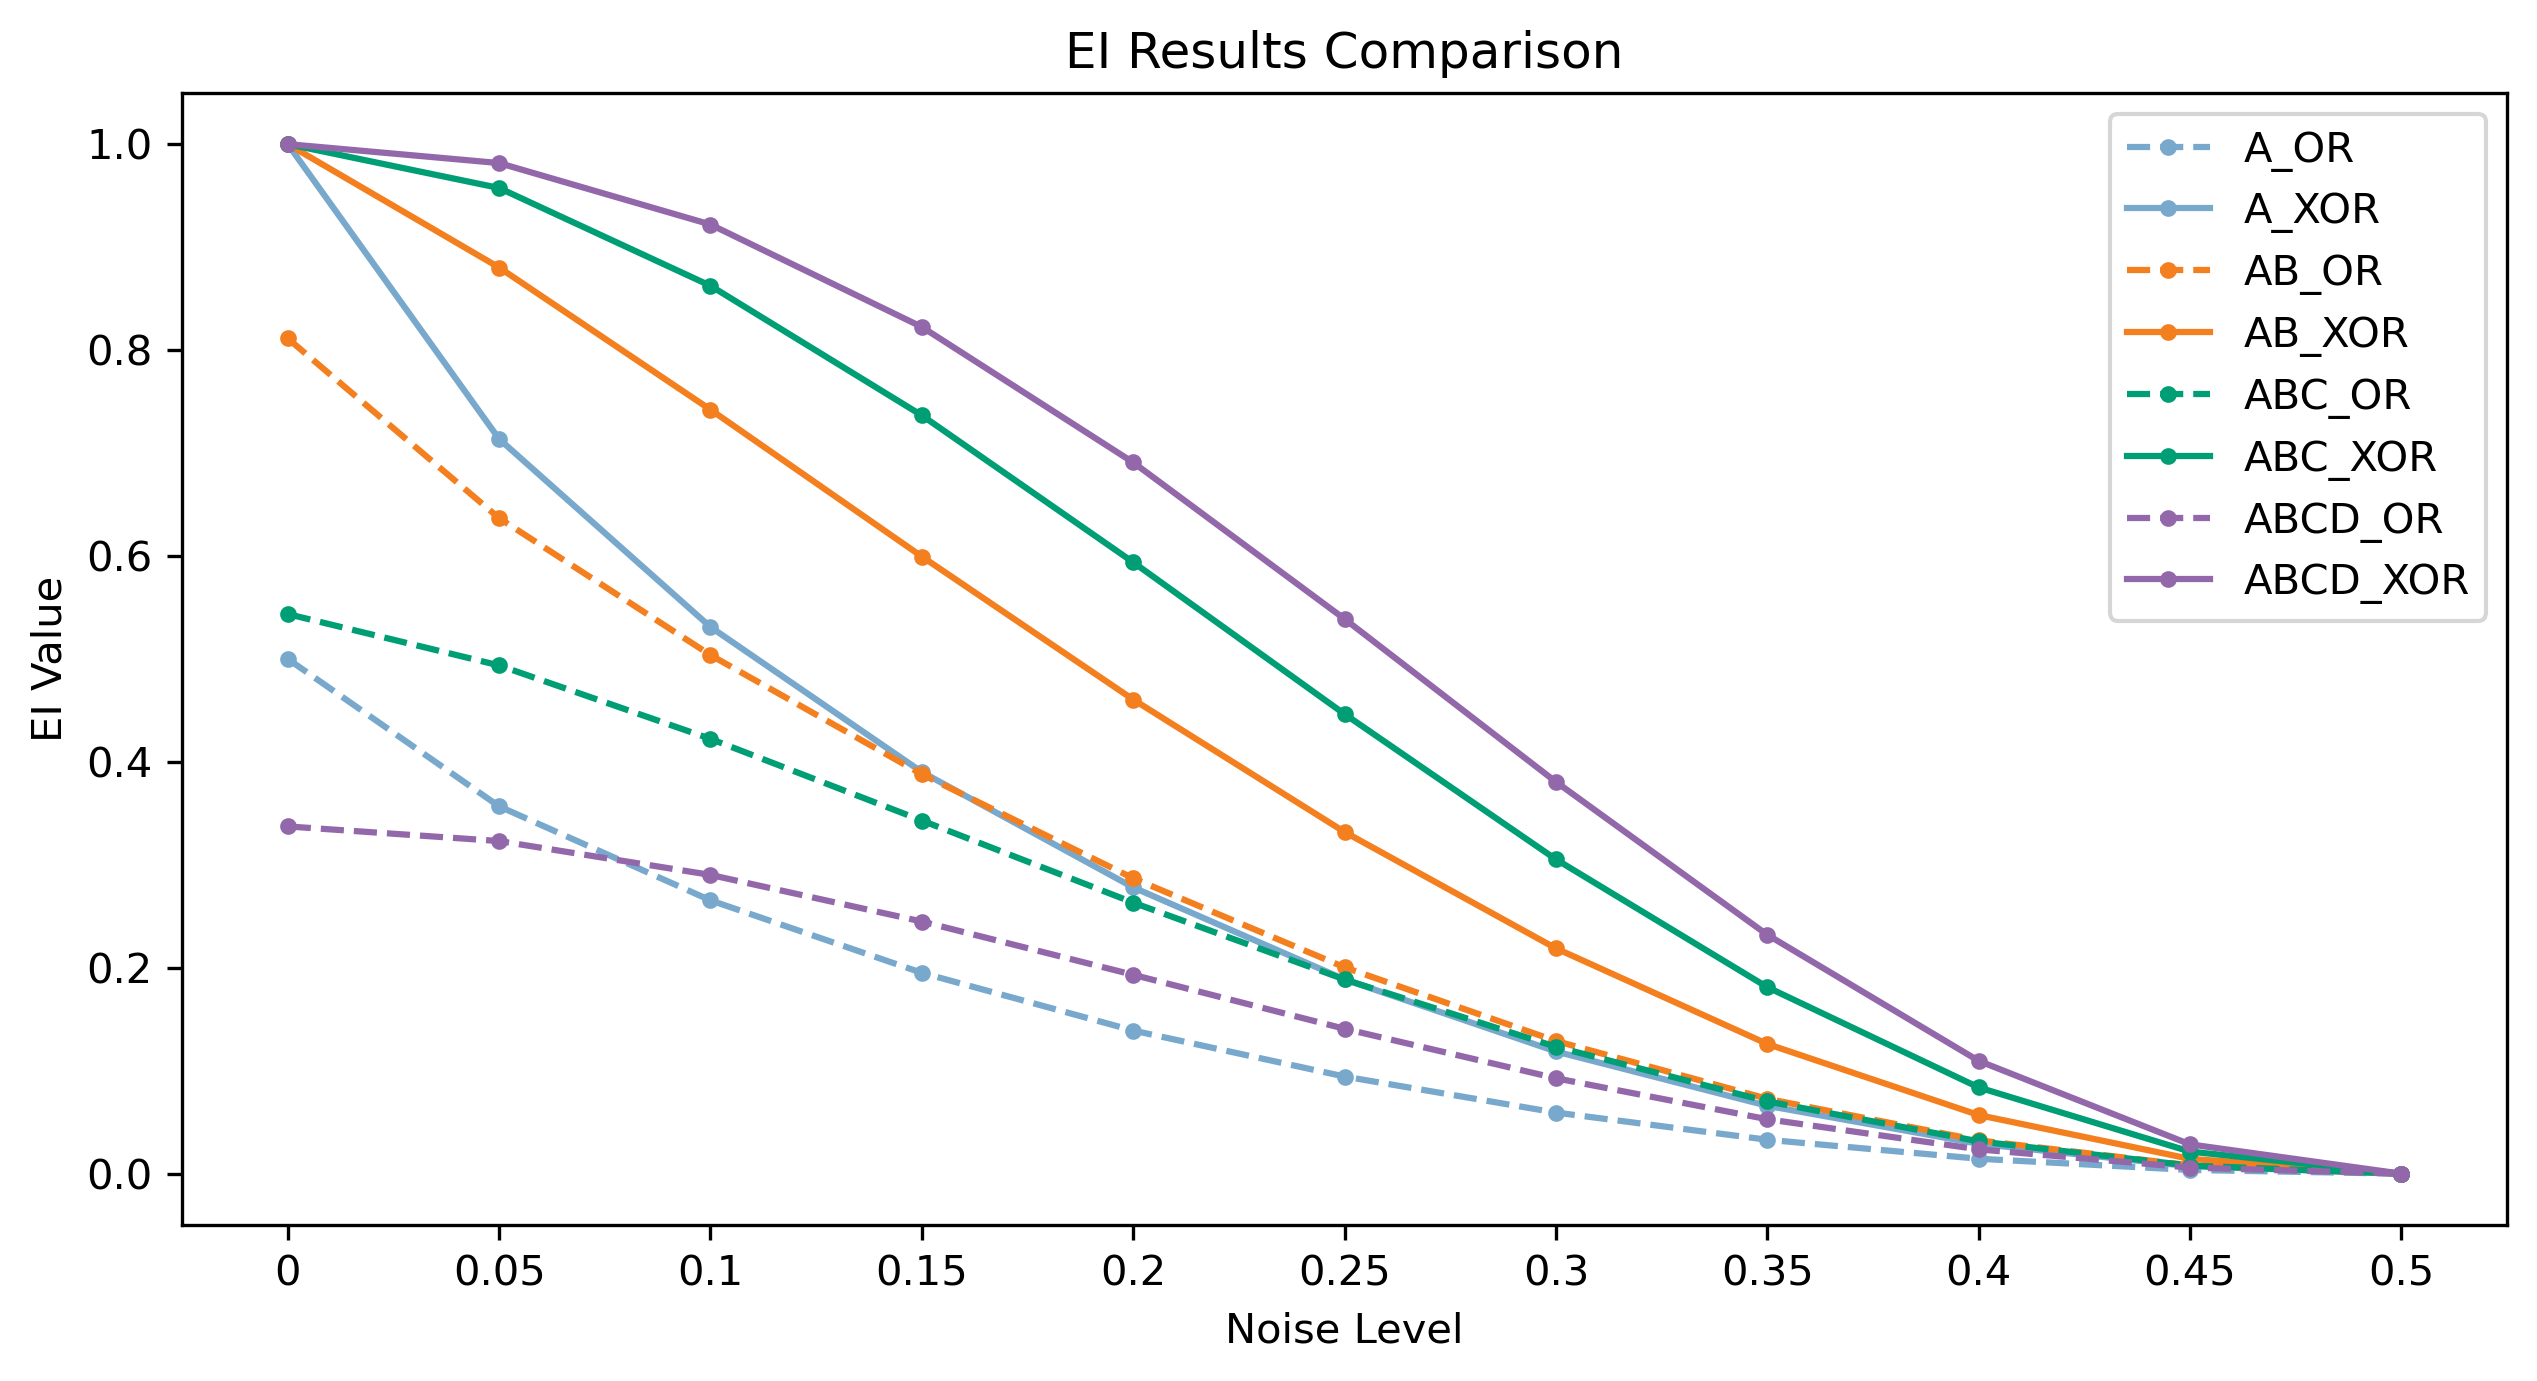

In [10]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(A_OR_EI_result.keys())
y_values_A_OR = list(A_OR_EI_result.values())
y_values_A_XOR = list(A_XOR_EI_result.values())
y_values_AB_OR = list(AB_OR_EI_result.values())
y_values_AB_XOR = list(AB_XOR_EI_result.values())
y_values_ABC_OR = list(ABC_OR_EI_result.values())
y_values_ABC_XOR = list(ABC_XOR_EI_result.values())
y_values_ABCD_OR = list(ABCD_OR_EI_result.values())
y_values_ABCD_XOR = list(ABCD_XOR_EI_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_A_OR, label='A_OR', marker='o', markersize=3, color=colors['A'], linestyle='--')
plt.plot(x_labels, y_values_A_XOR, label='A_XOR', marker='o', markersize=3, color=colors['A'])
plt.plot(x_labels, y_values_AB_OR, label='AB_OR', marker='o', markersize=3, color=colors['AB'], linestyle='--')
plt.plot(x_labels, y_values_AB_XOR, label='AB_XOR', marker='o', markersize=3, color=colors['AB'])
plt.plot(x_labels, y_values_ABC_OR, label='ABC_OR', marker='o', markersize=3, color=colors['ABC'], linestyle='--')
plt.plot(x_labels, y_values_ABC_XOR, label='ABC_XOR', marker='o', markersize=3, color=colors['ABC'])
plt.plot(x_labels, y_values_ABCD_OR, label='ABCD_OR', marker='o', markersize=3, color=colors['ABCD'], linestyle='--')
plt.plot(x_labels, y_values_ABCD_XOR, label='ABCD_XOR', marker='o', markersize=3, color=colors['ABCD'])

plt.title('EI Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('EI Value')
plt.legend()

plt.show()

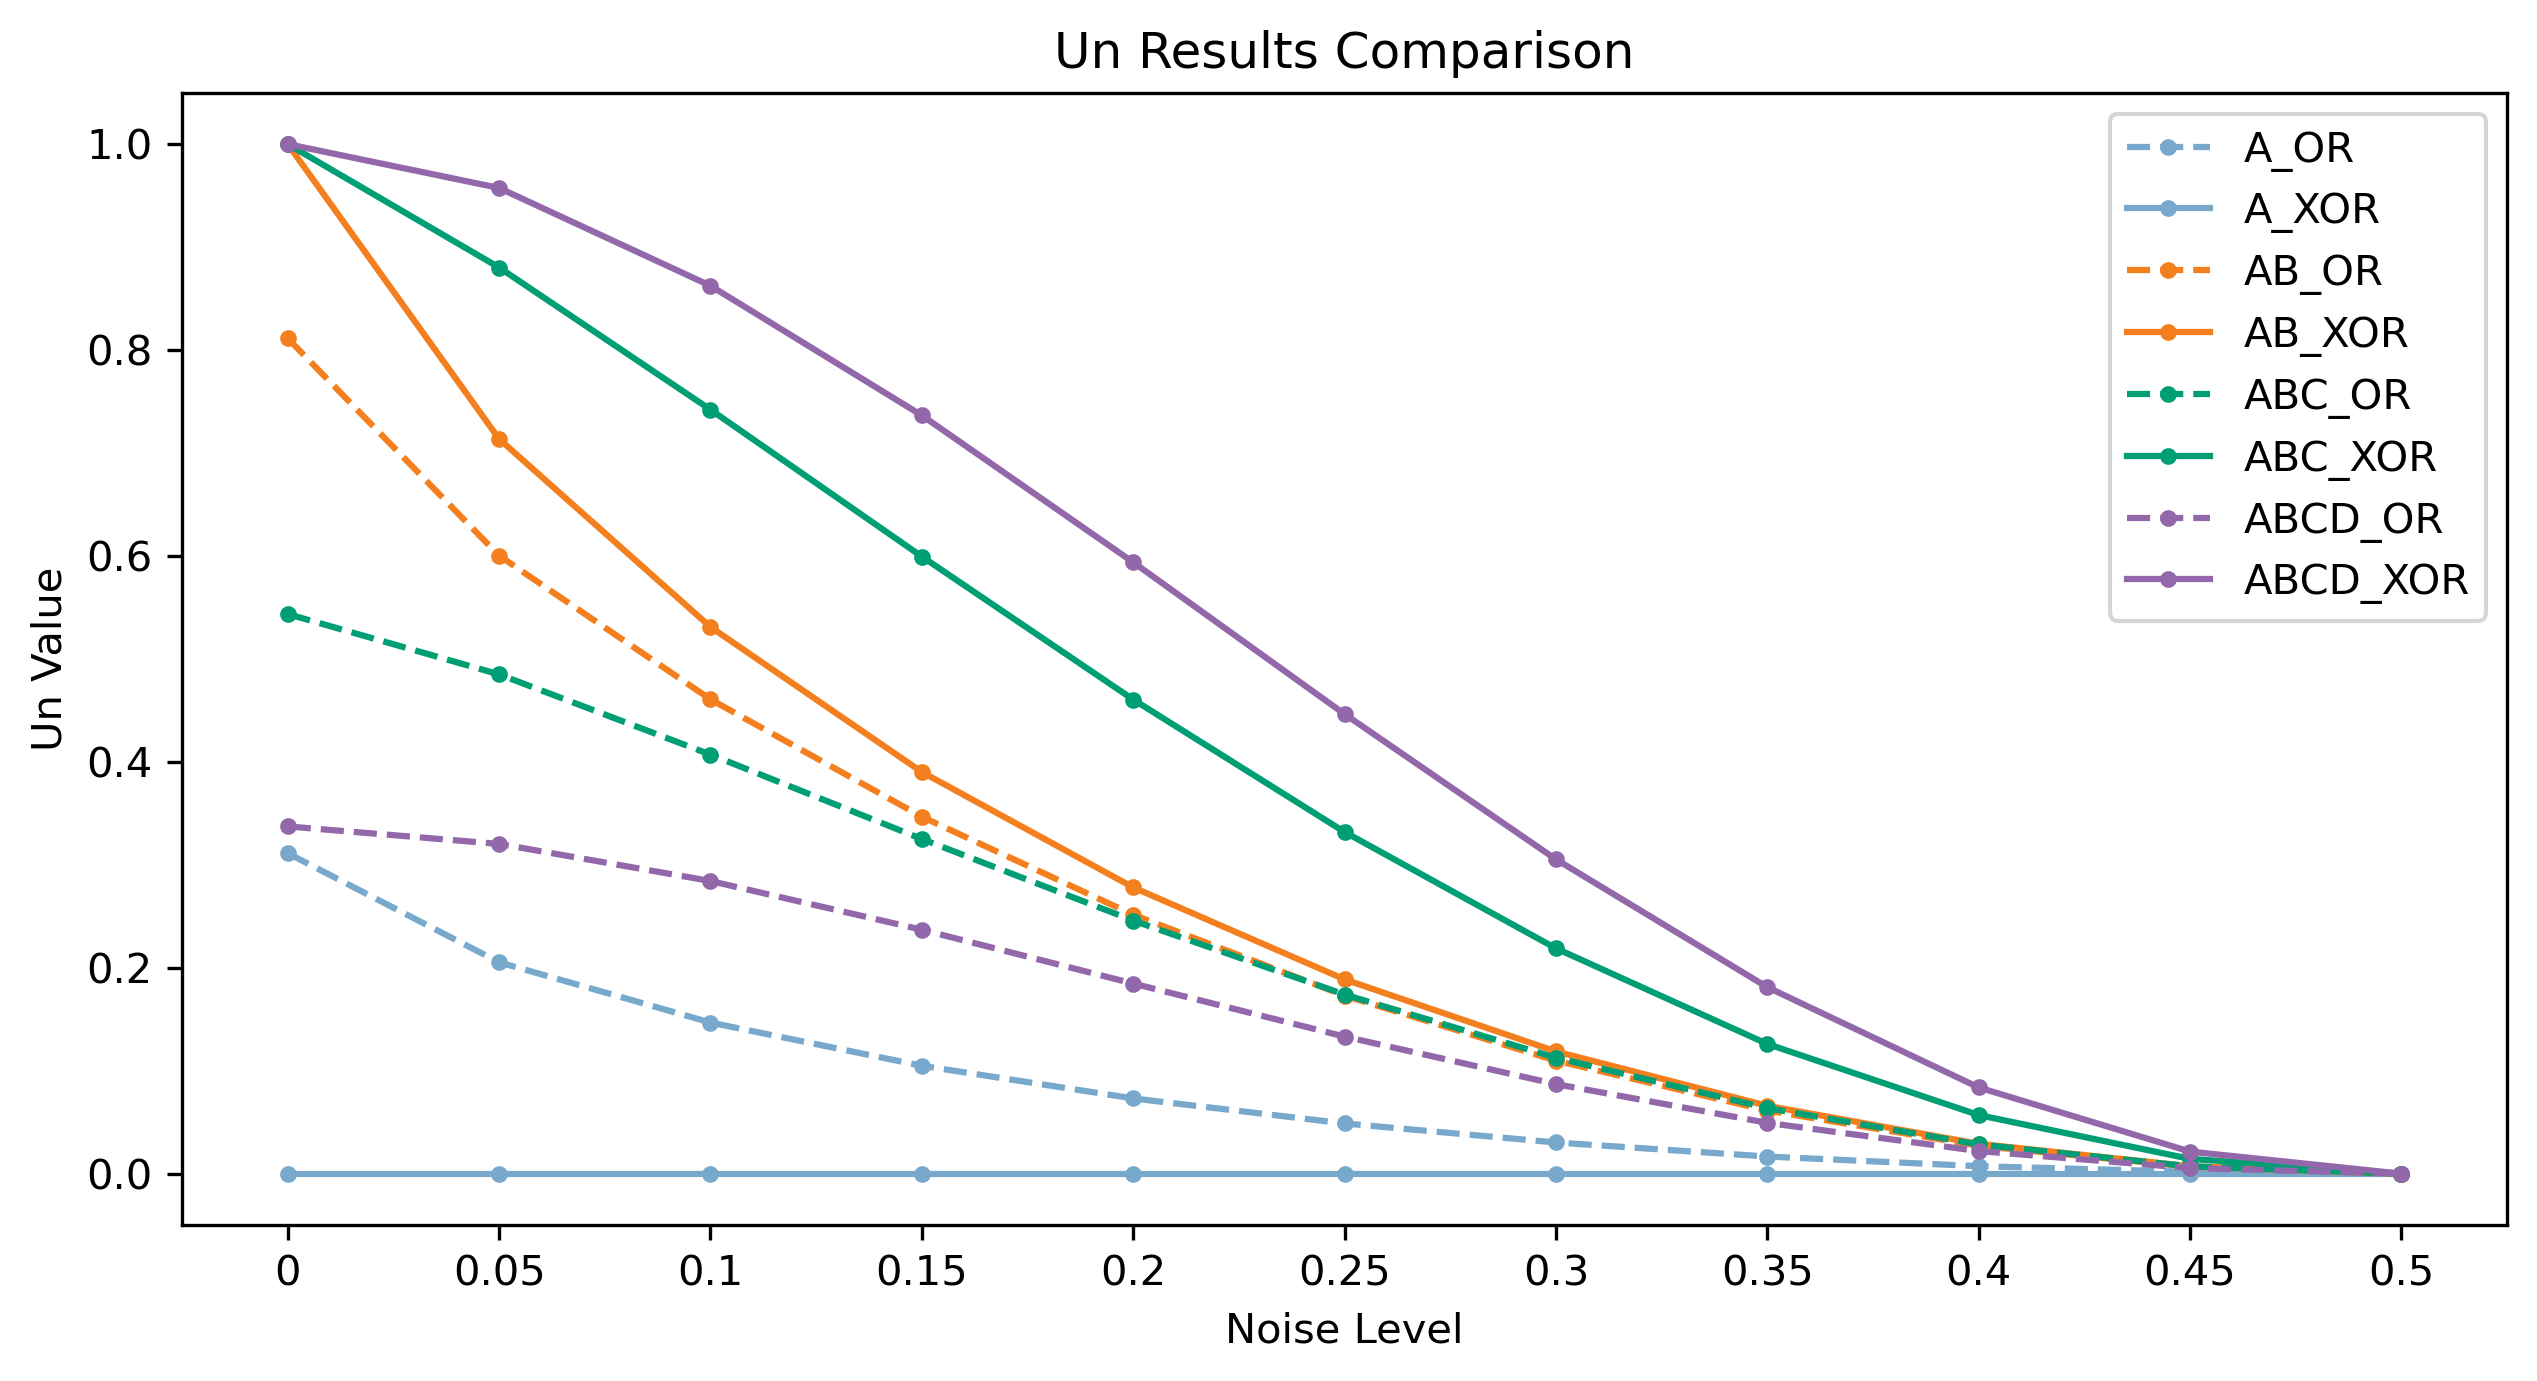

In [11]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(A_OR_Un_result.keys())
y_values_A_OR = list(A_OR_Un_result.values())
y_values_A_XOR = list(A_XOR_Un_result.values())
y_values_AB_OR = list(AB_OR_Un_result.values())
y_values_AB_XOR = list(AB_XOR_Un_result.values())
y_values_ABC_OR = list(ABC_OR_Un_result.values())
y_values_ABC_XOR = list(ABC_XOR_Un_result.values())
y_values_ABCD_OR = list(ABCD_OR_Un_result.values())
y_values_ABCD_XOR = list(ABCD_XOR_Un_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_A_OR, label='A_OR', marker='o', markersize=3, color=colors['A'], linestyle='--')
plt.plot(x_labels, y_values_A_XOR, label='A_XOR', marker='o', markersize=3, color=colors['A'])
plt.plot(x_labels, y_values_AB_OR, label='AB_OR', marker='o', markersize=3, color=colors['AB'], linestyle='--')
plt.plot(x_labels, y_values_AB_XOR, label='AB_XOR', marker='o', markersize=3, color=colors['AB'])
plt.plot(x_labels, y_values_ABC_OR, label='ABC_OR', marker='o', markersize=3, color=colors['ABC'], linestyle='--')
plt.plot(x_labels, y_values_ABC_XOR, label='ABC_XOR', marker='o', markersize=3, color=colors['ABC'])
plt.plot(x_labels, y_values_ABCD_OR, label='ABCD_OR', marker='o', markersize=3, color=colors['ABCD'], linestyle='--')
plt.plot(x_labels, y_values_ABCD_XOR, label='ABCD_XOR', marker='o', markersize=3, color=colors['ABCD'])

plt.title('Un Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Un Value')
plt.legend()

plt.show()

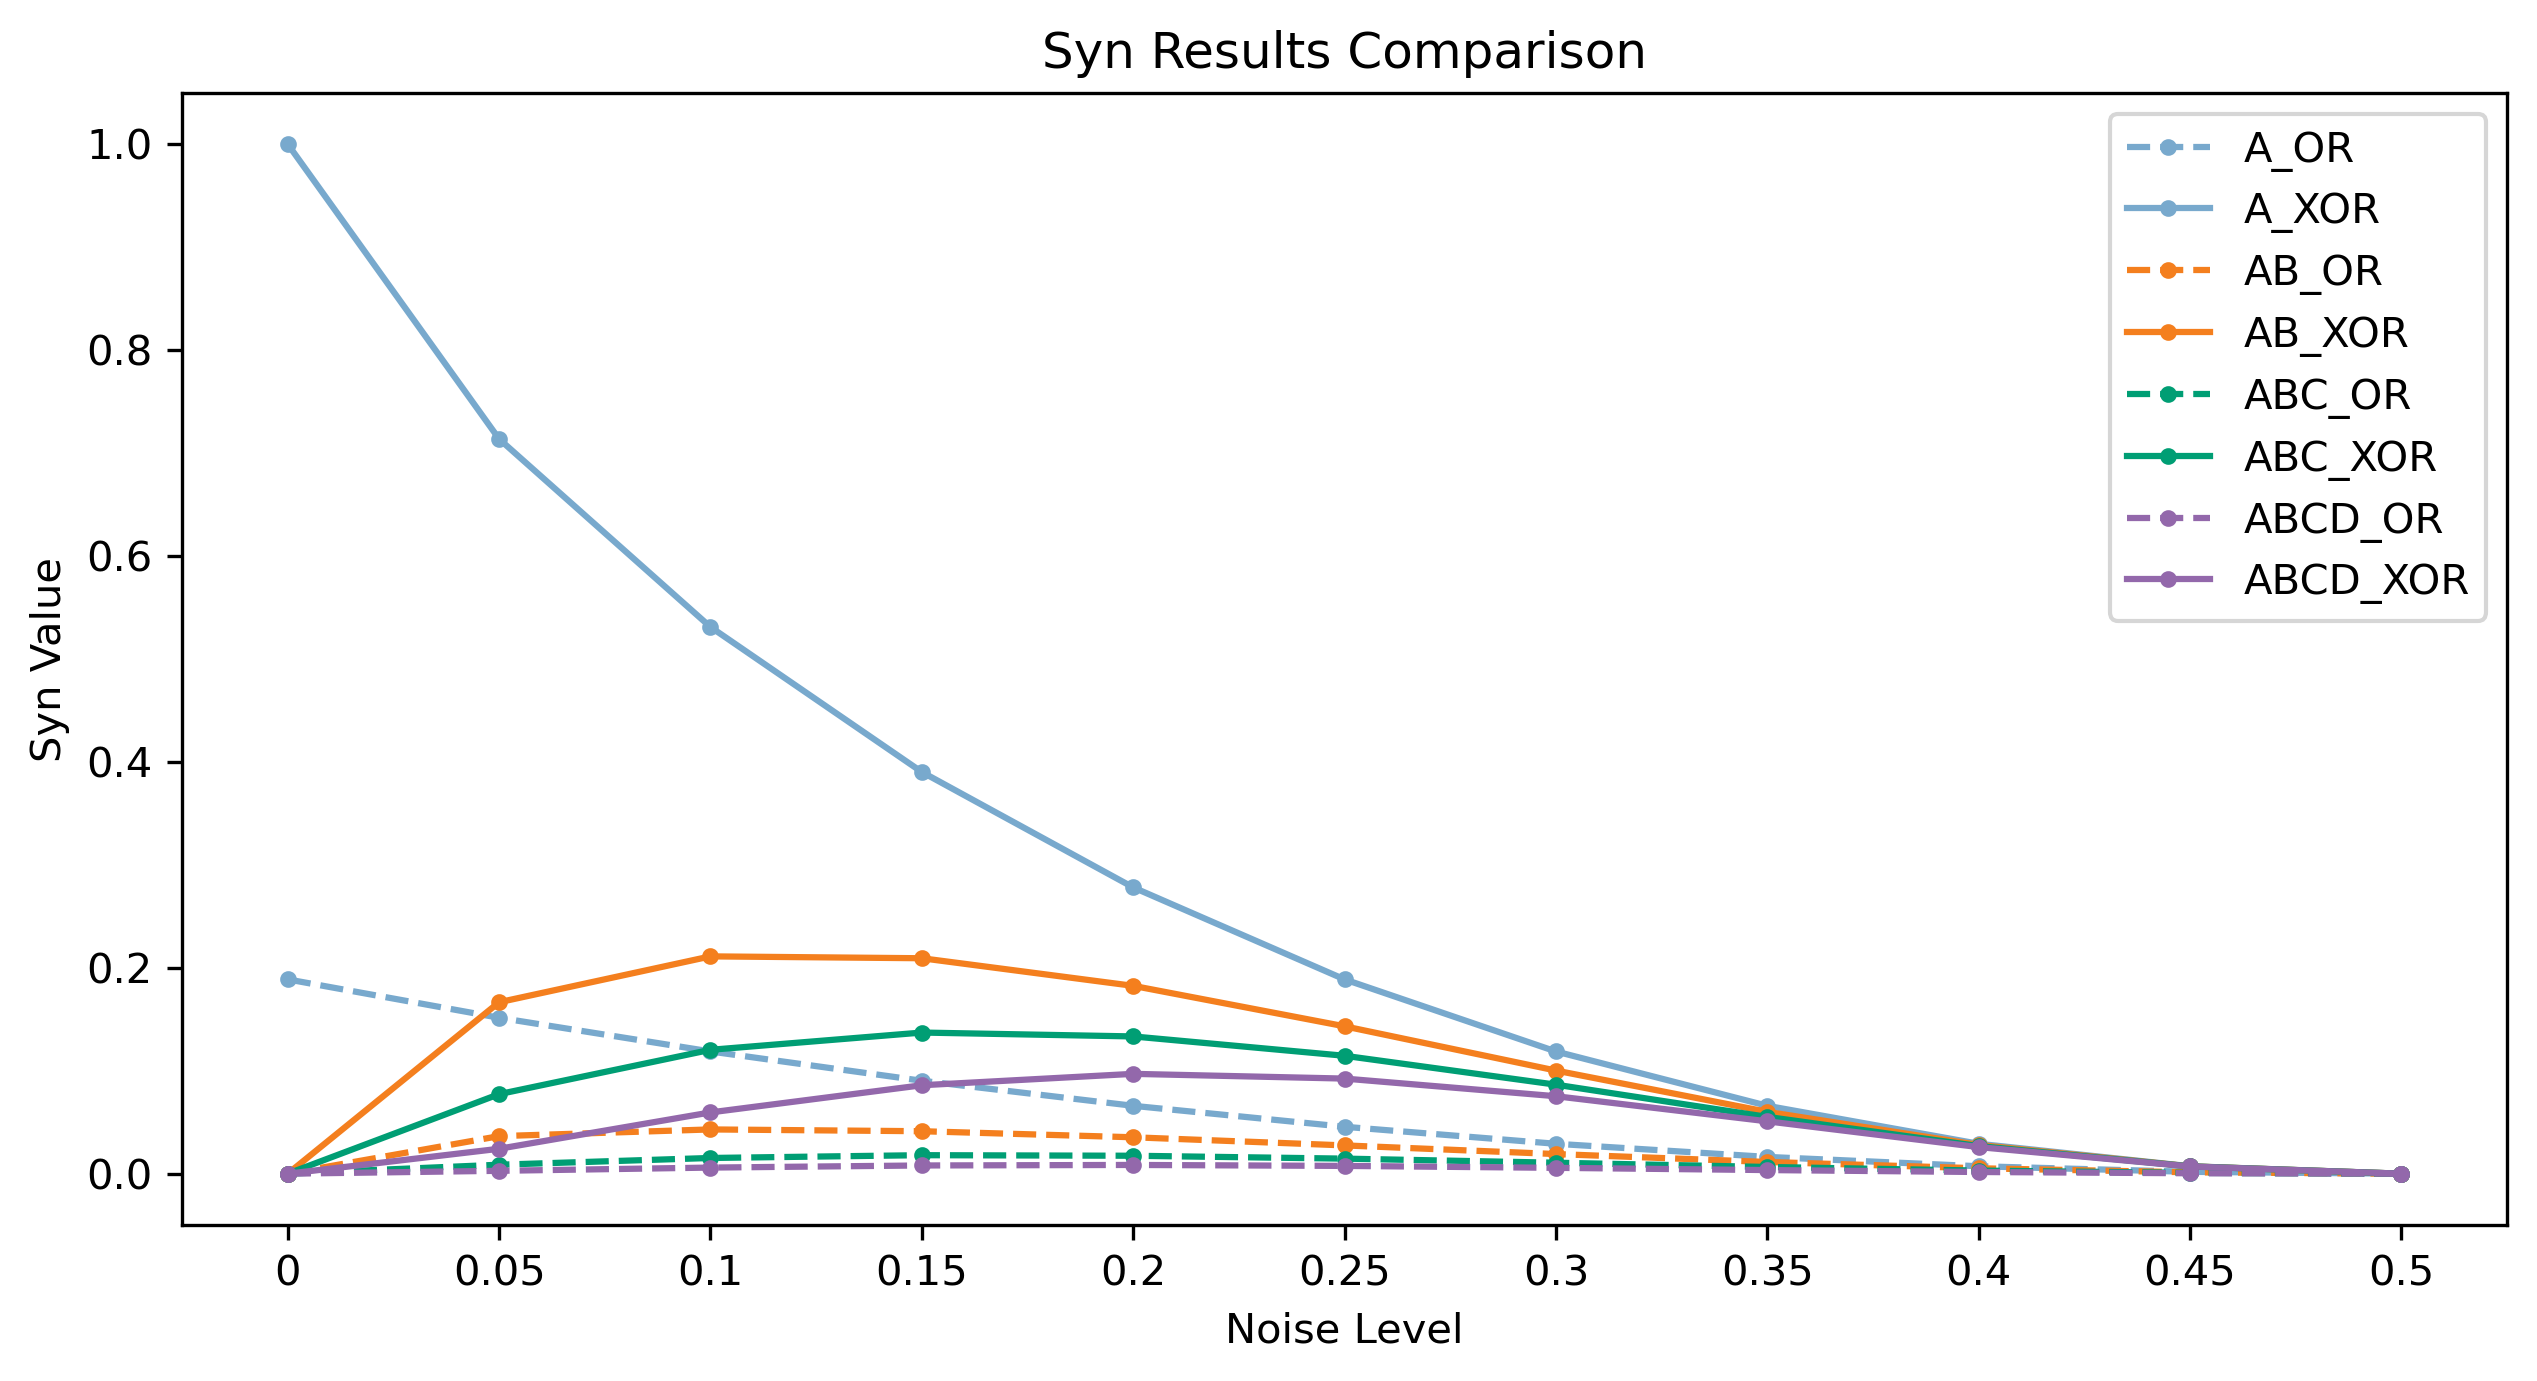

In [12]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(A_OR_Syn_result.keys())
y_values_A_OR = list(A_OR_Syn_result.values())
y_values_A_XOR = list(A_XOR_Syn_result.values())
y_values_AB_OR = list(AB_OR_Syn_result.values())
y_values_AB_XOR = list(AB_XOR_Syn_result.values())
y_values_ABC_OR = list(ABC_OR_Syn_result.values())
y_values_ABC_XOR = list(ABC_XOR_Syn_result.values())
y_values_ABCD_OR = list(ABCD_OR_Syn_result.values())
y_values_ABCD_XOR = list(ABCD_XOR_Syn_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_A_OR, label='A_OR', marker='o', markersize=3, color=colors['A'], linestyle='--')
plt.plot(x_labels, y_values_A_XOR, label='A_XOR', marker='o', markersize=3, color=colors['A'])
plt.plot(x_labels, y_values_AB_OR, label='AB_OR', marker='o', markersize=3, color=colors['AB'], linestyle='--')
plt.plot(x_labels, y_values_AB_XOR, label='AB_XOR', marker='o', markersize=3, color=colors['AB'])
plt.plot(x_labels, y_values_ABC_OR, label='ABC_OR', marker='o', markersize=3, color=colors['ABC'], linestyle='--')
plt.plot(x_labels, y_values_ABC_XOR, label='ABC_XOR', marker='o', markersize=3, color=colors['ABC'])
plt.plot(x_labels, y_values_ABCD_OR, label='ABCD_OR', marker='o', markersize=3, color=colors['ABCD'], linestyle='--')
plt.plot(x_labels, y_values_ABCD_XOR, label='ABCD_XOR', marker='o', markersize=3, color=colors['ABCD'])

plt.title('Syn Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Syn Value')
plt.legend()

plt.show()

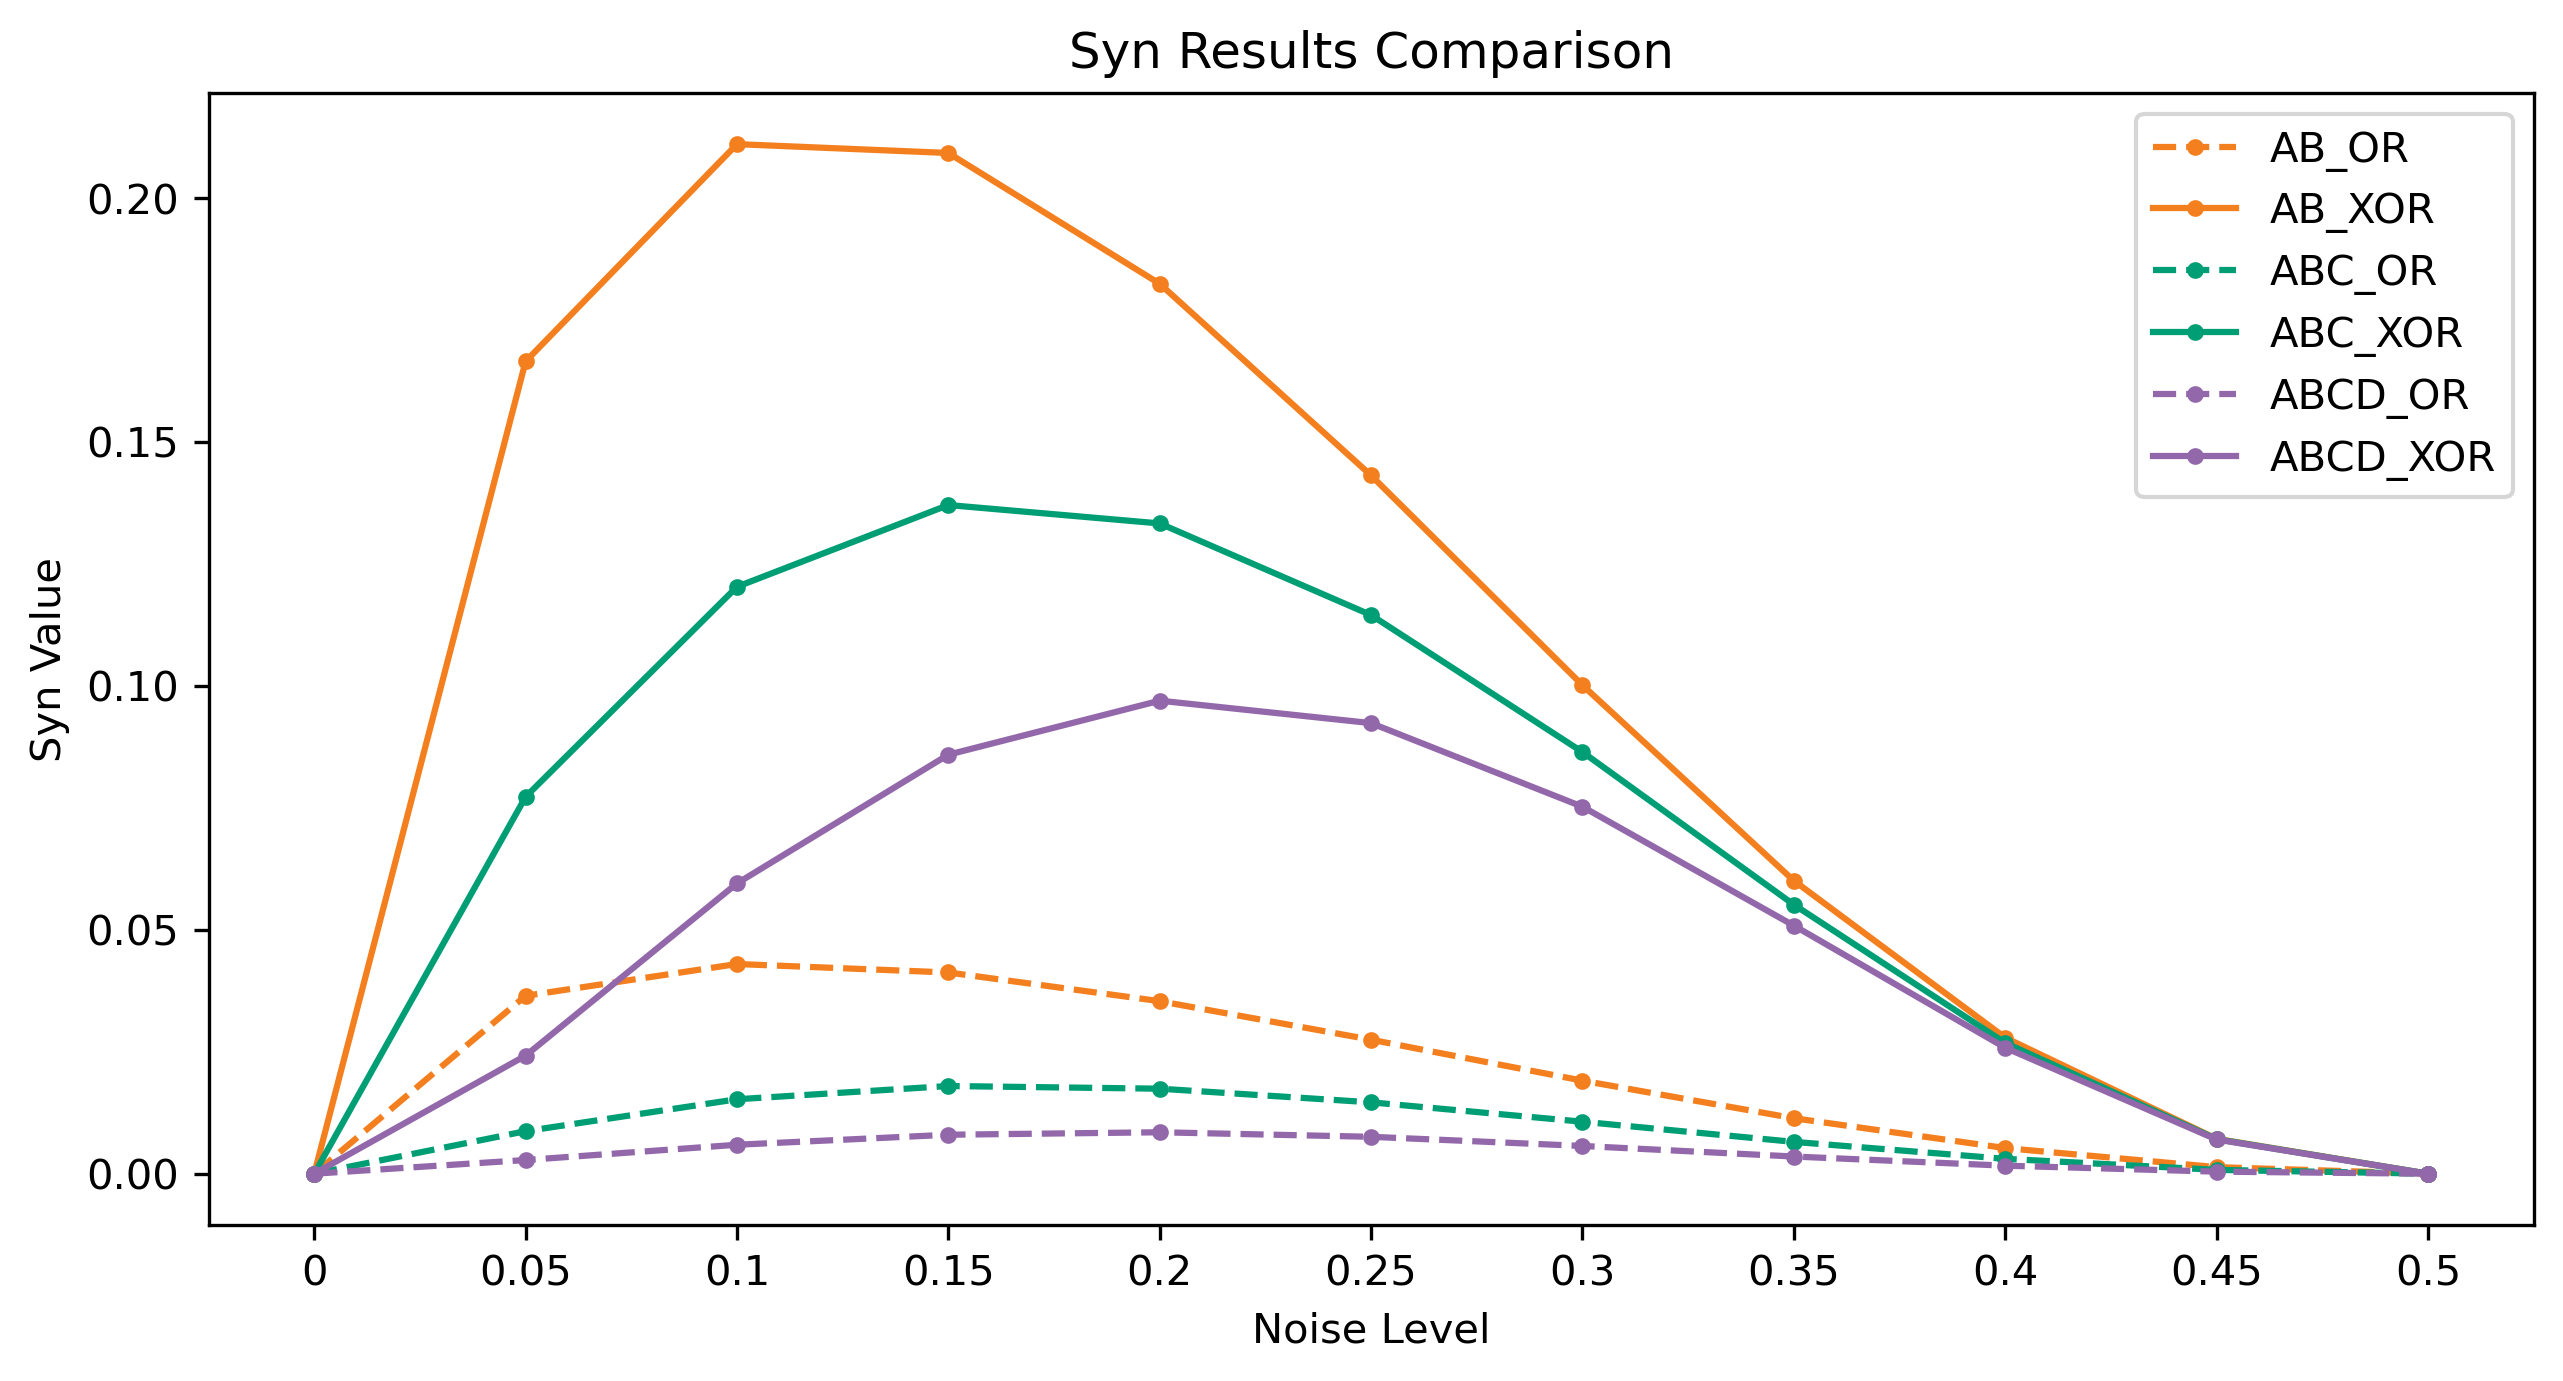

In [15]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(A_OR_Syn_result.keys())
y_values_AB_OR = list(AB_OR_Syn_result.values())
y_values_AB_XOR = list(AB_XOR_Syn_result.values())
y_values_ABC_OR = list(ABC_OR_Syn_result.values())
y_values_ABC_XOR = list(ABC_XOR_Syn_result.values())
y_values_ABCD_OR = list(ABCD_OR_Syn_result.values())
y_values_ABCD_XOR = list(ABCD_XOR_Syn_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_AB_OR, label='AB_OR', marker='o', markersize=3, color=colors['AB'], linestyle='--')
plt.plot(x_labels, y_values_AB_XOR, label='AB_XOR', marker='o', markersize=3, color=colors['AB'])
plt.plot(x_labels, y_values_ABC_OR, label='ABC_OR', marker='o', markersize=3, color=colors['ABC'], linestyle='--')
plt.plot(x_labels, y_values_ABC_XOR, label='ABC_XOR', marker='o', markersize=3, color=colors['ABC'])
plt.plot(x_labels, y_values_ABCD_OR, label='ABCD_OR', marker='o', markersize=3, color=colors['ABCD'], linestyle='--')
plt.plot(x_labels, y_values_ABCD_XOR, label='ABCD_XOR', marker='o', markersize=3, color=colors['ABCD'])

plt.title('Syn Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Syn Value')
plt.legend()

plt.show()

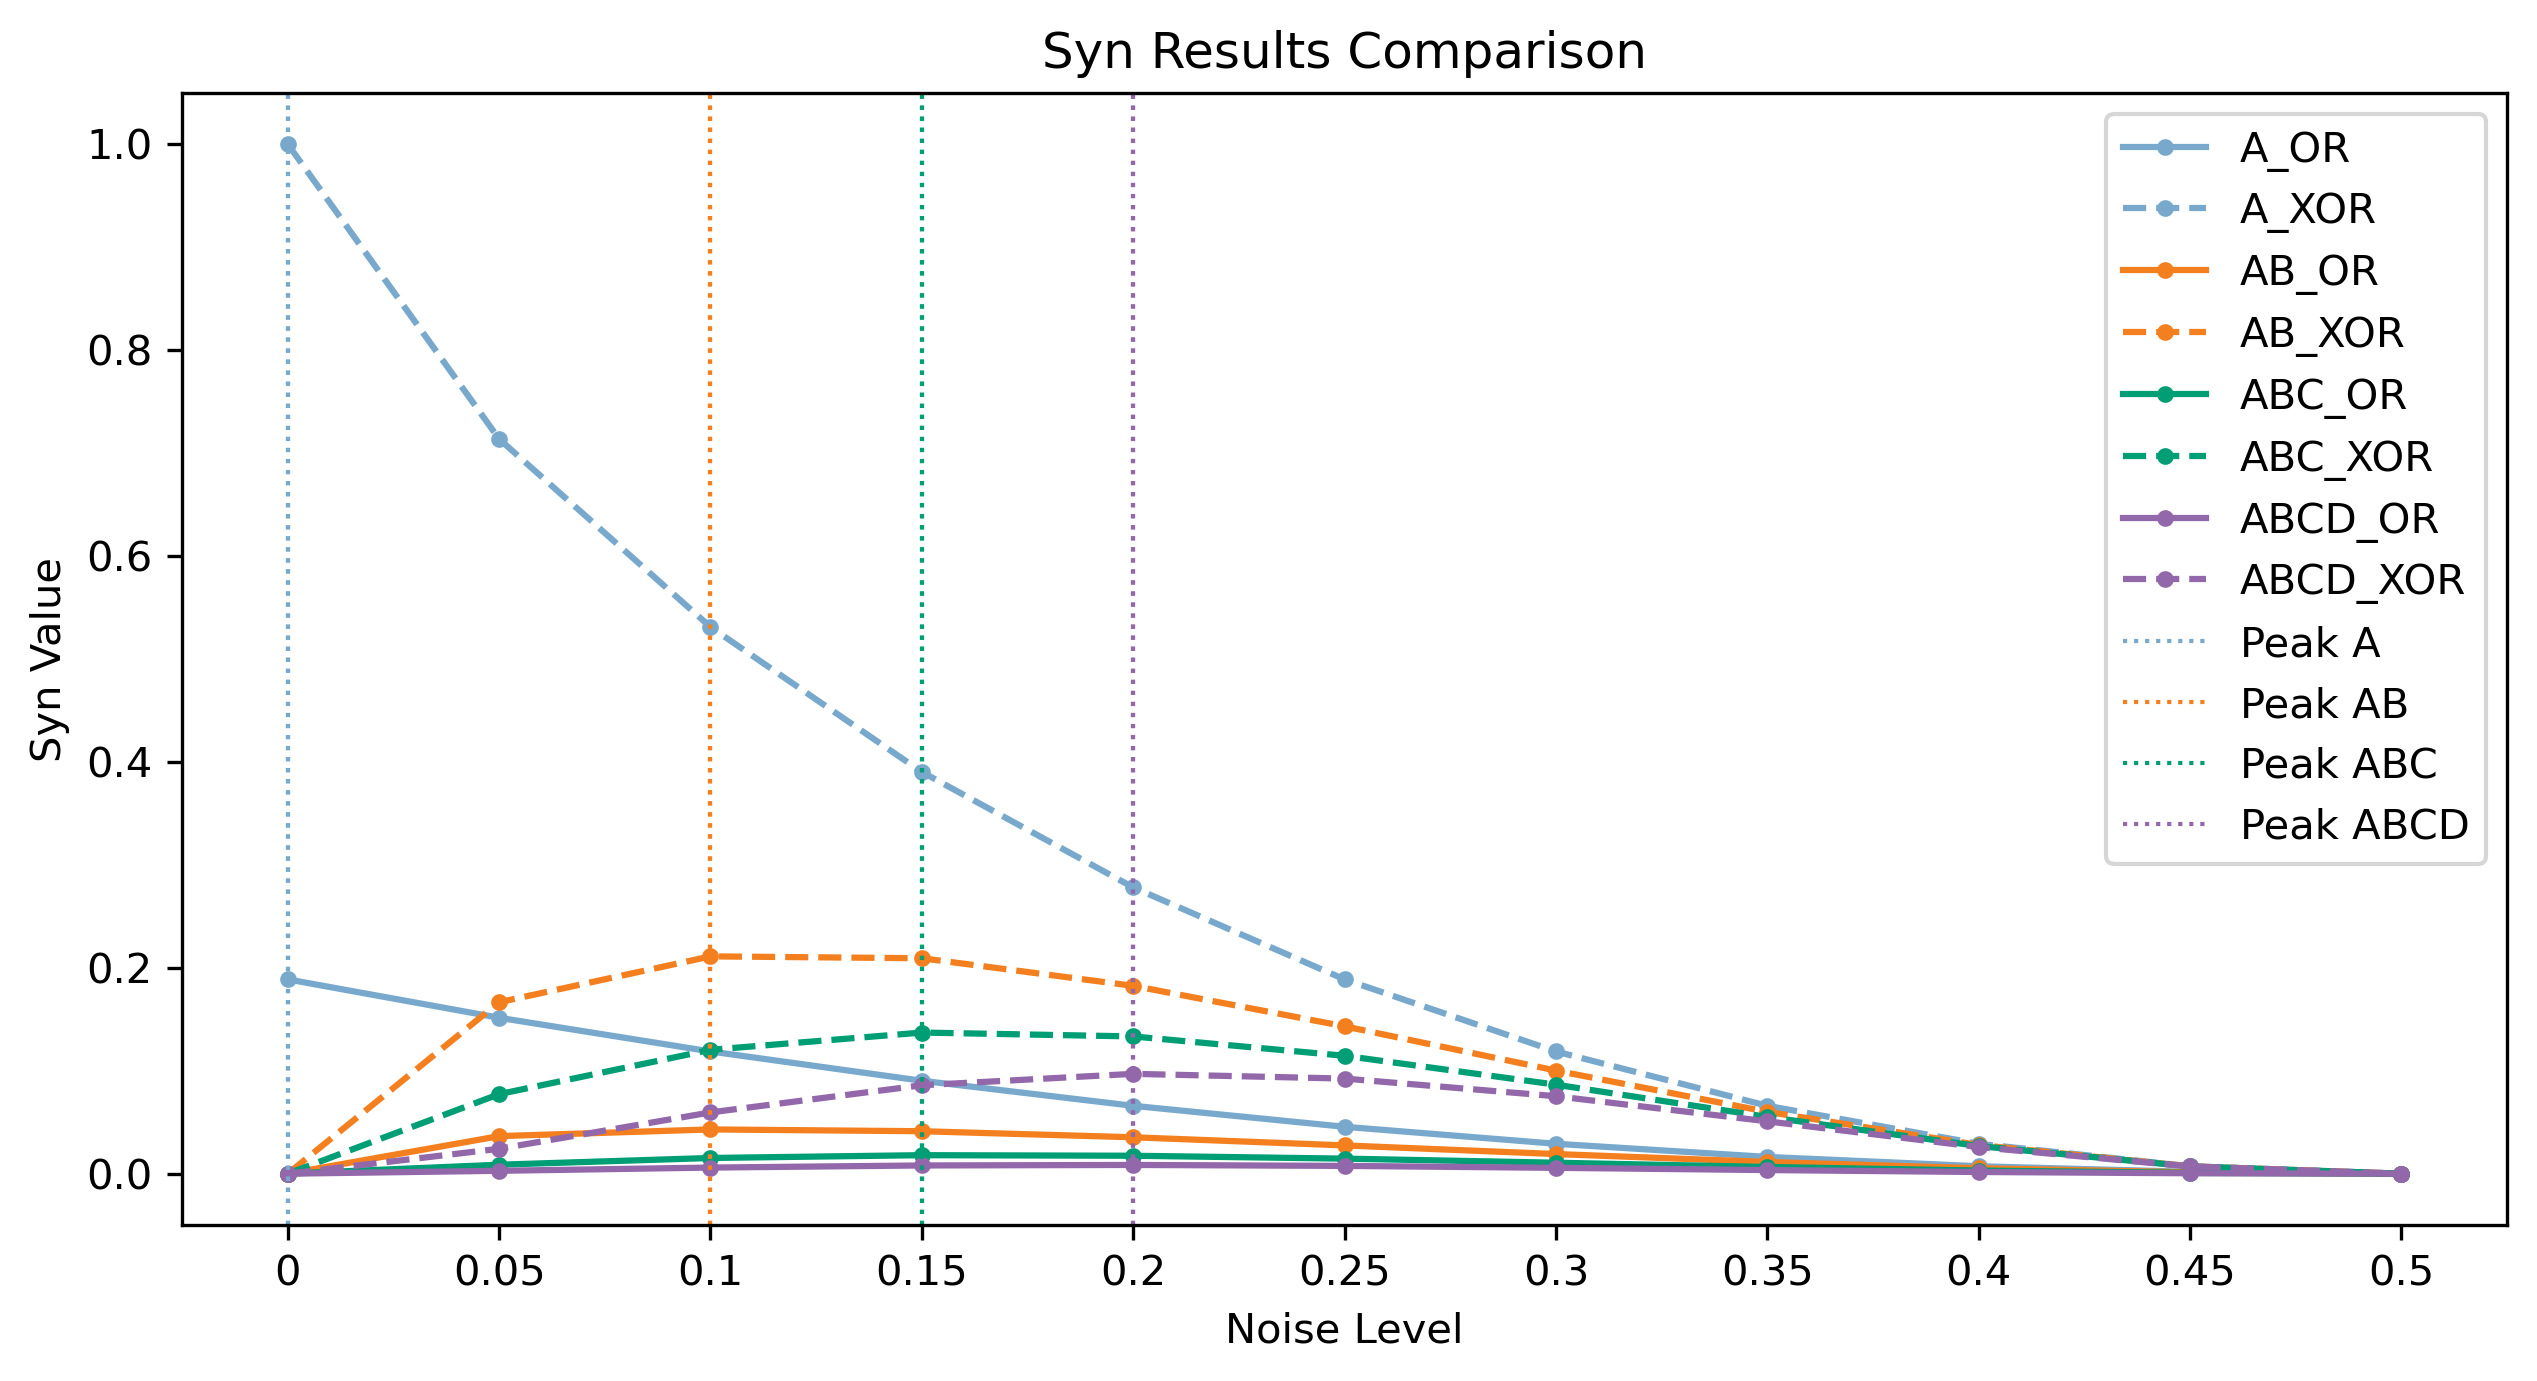

In [16]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(A_OR_Syn_result.keys())
y_values_A_OR = list(A_OR_Syn_result.values())
y_values_A_XOR = list(A_XOR_Syn_result.values())
y_values_AB_OR = list(AB_OR_Syn_result.values())
y_values_AB_XOR = list(AB_XOR_Syn_result.values())
y_values_ABC_OR = list(ABC_OR_Syn_result.values())
y_values_ABC_XOR = list(ABC_XOR_Syn_result.values())
y_values_ABCD_OR = list(ABCD_OR_Syn_result.values())
y_values_ABCD_XOR = list(ABCD_XOR_Syn_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_A_OR, label='A_OR', marker='o', markersize=3, color=colors['A'])
plt.plot(x_labels, y_values_A_XOR, label='A_XOR', marker='o', markersize=3, color=colors['A'], linestyle='--')
plt.plot(x_labels, y_values_AB_OR, label='AB_OR', marker='o', markersize=3, color=colors['AB'])
plt.plot(x_labels, y_values_AB_XOR, label='AB_XOR', marker='o', markersize=3, color=colors['AB'], linestyle='--')
plt.plot(x_labels, y_values_ABC_OR, label='ABC_OR', marker='o', markersize=3, color=colors['ABC'])
plt.plot(x_labels, y_values_ABC_XOR, label='ABC_XOR', marker='o', markersize=3, color=colors['ABC'], linestyle='--')
plt.plot(x_labels, y_values_ABCD_OR, label='ABCD_OR', marker='o', markersize=3, color=colors['ABCD'])
plt.plot(x_labels, y_values_ABCD_XOR, label='ABCD_XOR', marker='o', markersize=3, color=colors['ABCD'], linestyle='--')

max_idx_A_OR = y_values_A_OR.index(max(y_values_A_OR))
plt.axvline(x=x_labels[max_idx_A_OR], color=colors['A'], linestyle=':', lw=1, label='Peak A')
max_idx_A_XOR = y_values_A_XOR.index(max(y_values_A_XOR))
plt.axvline(x=x_labels[max_idx_A_XOR], color=colors['A'], linestyle=':', lw=1)
max_idx_AB_OR = y_values_AB_OR.index(max(y_values_AB_OR))
plt.axvline(x=x_labels[max_idx_AB_OR], color=colors['AB'], linestyle=':', lw=1, label='Peak AB')
max_idx_AB_XOR = y_values_AB_XOR.index(max(y_values_AB_XOR))
plt.axvline(x=x_labels[max_idx_AB_XOR], color=colors['AB'], linestyle=':', lw=1)
max_idx_ABC_OR = y_values_ABC_OR.index(max(y_values_ABC_OR))
plt.axvline(x=x_labels[max_idx_ABC_OR], color=colors['ABC'], linestyle=':', lw=1, label='Peak ABC')
max_idx_ABC_XOR = y_values_ABC_XOR.index(max(y_values_ABC_XOR))
plt.axvline(x=x_labels[max_idx_ABC_XOR], color=colors['ABC'], linestyle=':', lw=1)
max_idx_ABCD_OR = y_values_ABCD_OR.index(max(y_values_ABCD_OR))
plt.axvline(x=x_labels[max_idx_ABCD_OR], color=colors['ABCD'], linestyle=':', lw=1, label='Peak ABCD')
max_idx_ABCD_XOR = y_values_ABCD_XOR.index(max(y_values_ABCD_XOR))
plt.axvline(x=x_labels[max_idx_ABCD_XOR], color=colors['ABCD'], linestyle=':', lw=1)

plt.title('Syn Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Syn Value')
plt.legend()

plt.show()

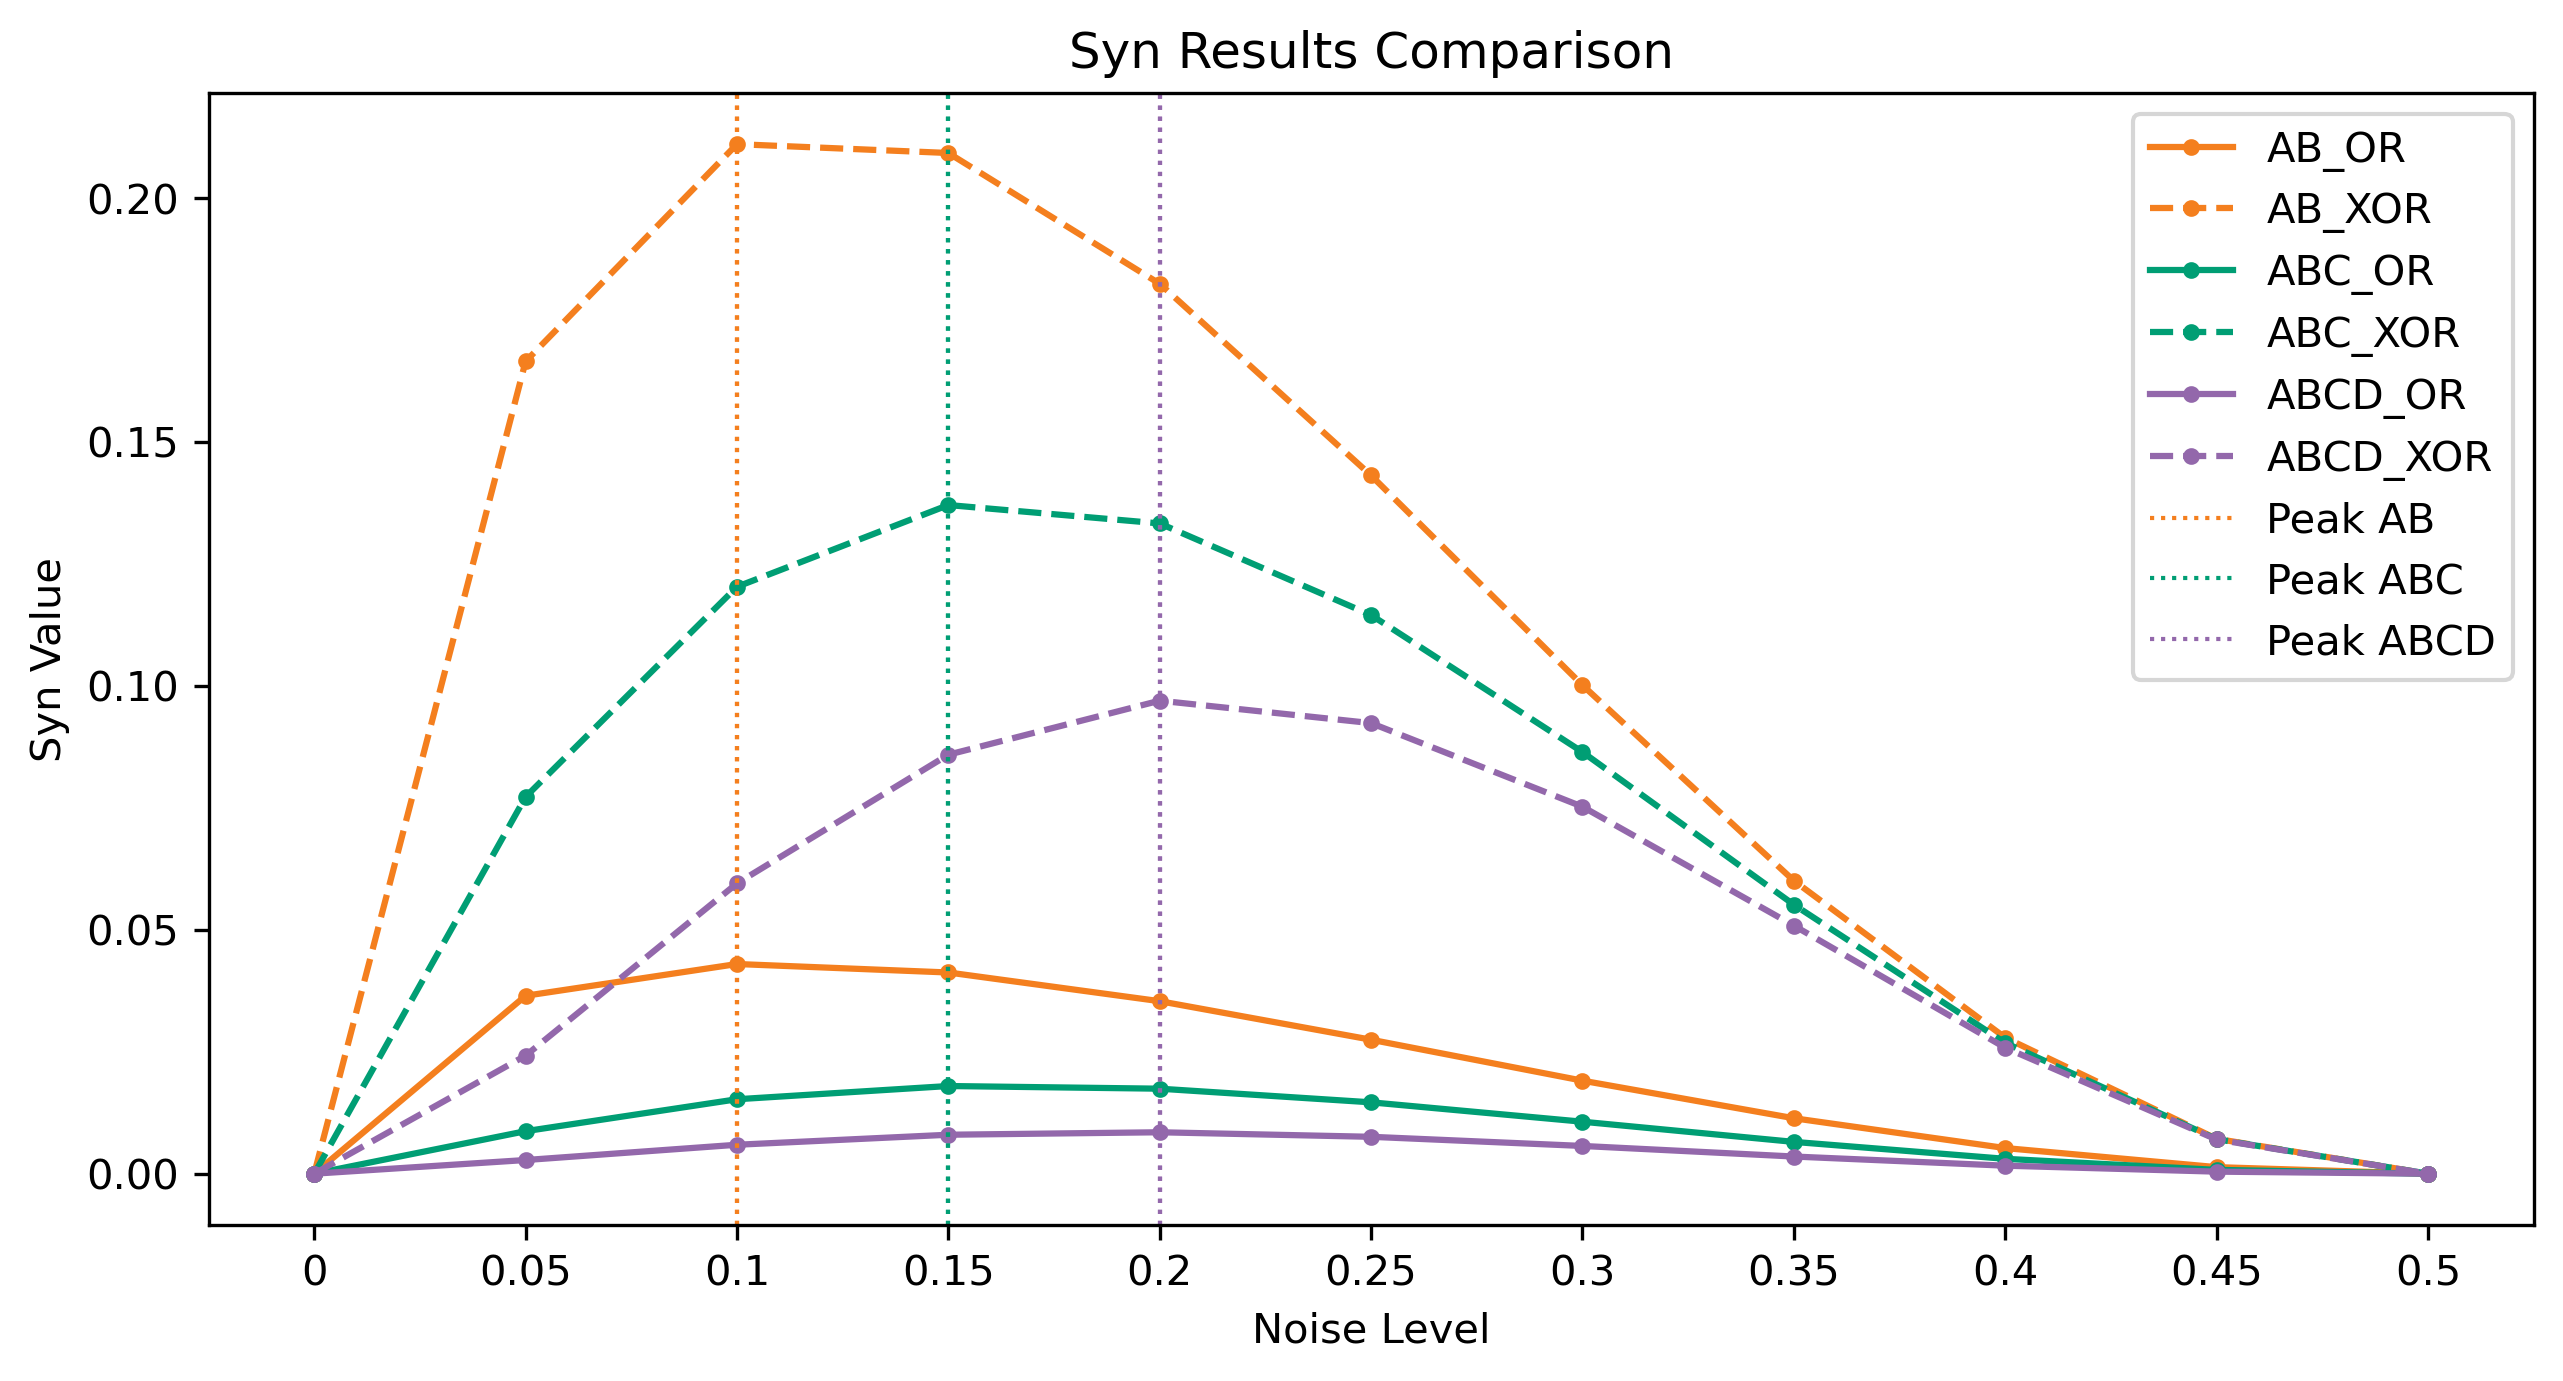

In [18]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(A_OR_Syn_result.keys())
y_values_A_OR = list(A_OR_Syn_result.values())
y_values_A_XOR = list(A_XOR_Syn_result.values())
y_values_AB_OR = list(AB_OR_Syn_result.values())
y_values_AB_XOR = list(AB_XOR_Syn_result.values())
y_values_ABC_OR = list(ABC_OR_Syn_result.values())
y_values_ABC_XOR = list(ABC_XOR_Syn_result.values())
y_values_ABCD_OR = list(ABCD_OR_Syn_result.values())
y_values_ABCD_XOR = list(ABCD_XOR_Syn_result.values())

plt.figure(figsize=(10, 5), dpi=300)
#plt.plot(x_labels, y_values_A_OR, label='A_OR', marker='o', markersize=3, color=colors['A'])
#plt.plot(x_labels, y_values_A_XOR, label='A_XOR', marker='o', markersize=3, color=colors['A'], linestyle='--')
plt.plot(x_labels, y_values_AB_OR, label='AB_OR', marker='o', markersize=3, color=colors['AB'])
plt.plot(x_labels, y_values_AB_XOR, label='AB_XOR', marker='o', markersize=3, color=colors['AB'], linestyle='--')
plt.plot(x_labels, y_values_ABC_OR, label='ABC_OR', marker='o', markersize=3, color=colors['ABC'])
plt.plot(x_labels, y_values_ABC_XOR, label='ABC_XOR', marker='o', markersize=3, color=colors['ABC'], linestyle='--')
plt.plot(x_labels, y_values_ABCD_OR, label='ABCD_OR', marker='o', markersize=3, color=colors['ABCD'])
plt.plot(x_labels, y_values_ABCD_XOR, label='ABCD_XOR', marker='o', markersize=3, color=colors['ABCD'], linestyle='--')

#max_idx_A_OR = y_values_A_OR.index(max(y_values_A_OR))
#plt.axvline(x=x_labels[max_idx_A_OR], color=colors['A'], linestyle=':', lw=1, label='Peak A')
#max_idx_A_XOR = y_values_A_XOR.index(max(y_values_A_XOR))
#plt.axvline(x=x_labels[max_idx_A_XOR], color=colors['A'], linestyle=':', lw=1)
max_idx_AB_OR = y_values_AB_OR.index(max(y_values_AB_OR))
plt.axvline(x=x_labels[max_idx_AB_OR], color=colors['AB'], linestyle=':', lw=1, label='Peak AB')
max_idx_AB_XOR = y_values_AB_XOR.index(max(y_values_AB_XOR))
plt.axvline(x=x_labels[max_idx_AB_XOR], color=colors['AB'], linestyle=':', lw=1)
max_idx_ABC_OR = y_values_ABC_OR.index(max(y_values_ABC_OR))
plt.axvline(x=x_labels[max_idx_ABC_OR], color=colors['ABC'], linestyle=':', lw=1, label='Peak ABC')
max_idx_ABC_XOR = y_values_ABC_XOR.index(max(y_values_ABC_XOR))
plt.axvline(x=x_labels[max_idx_ABC_XOR], color=colors['ABC'], linestyle=':', lw=1)
max_idx_ABCD_OR = y_values_ABCD_OR.index(max(y_values_ABCD_OR))
plt.axvline(x=x_labels[max_idx_ABCD_OR], color=colors['ABCD'], linestyle=':', lw=1, label='Peak ABCD')
max_idx_ABCD_XOR = y_values_ABCD_XOR.index(max(y_values_ABCD_XOR))
plt.axvline(x=x_labels[max_idx_ABCD_XOR], color=colors['ABCD'], linestyle=':', lw=1)

plt.title('Syn Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Syn Value')
plt.legend()

plt.show()

In [17]:
import json

results = {
    'A_OR_EI': A_OR_EI_result,
    'A_OR_Un': A_OR_Un_result,
    'A_OR_Syn': A_OR_Syn_result,
    'A_XOR_EI': A_XOR_EI_result,
    'A_XOR_Un': A_XOR_Un_result,
    'A_XOR_Syn': A_XOR_Syn_result,
    'AB_OR_EI': AB_OR_EI_result,
    'AB_OR_Un': AB_OR_Un_result,
    'AB_OR_Syn': AB_OR_Syn_result,
    'AB_XOR_EI': AB_XOR_EI_result,
    'AB_XOR_Un': AB_XOR_Un_result,
    'AB_XOR_Syn': AB_XOR_Syn_result,
    'ABC_OR_EI': ABC_OR_EI_result,
    'ABC_OR_Un': ABC_OR_Un_result,
    'ABC_OR_Syn': ABC_OR_Syn_result,
    'ABC_XOR_EI': ABC_XOR_EI_result,
    'ABC_XOR_Un': ABC_XOR_Un_result,
    'ABC_XOR_Syn': ABC_XOR_Syn_result,
    'ABCD_OR_EI': ABCD_OR_EI_result,
    'ABCD_OR_Un': ABCD_OR_Un_result,
    'ABCD_OR_Syn': ABCD_OR_Syn_result,
    'ABCD_XOR_EI': ABCD_XOR_EI_result,
    'ABCD_XOR_Un': ABCD_XOR_Un_result,
    'ABCD_XOR_Syn': ABCD_XOR_Syn_result,
}

for key, value in results.items():
    with open(f'{key}.json', 'w') as f:
        json.dump(value, f, indent=4)